In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.4/799.4 kB 6.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.2.50 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.00GHz
CUDA                12.1

numpy               ✅ 1.25.2<2.0.0,>=1.23.0
matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.3.0+cu121>=1.8.0
torchvision         ✅ 0.18.0+cu121>=0.9.0
tqdm                ✅ 4.66.4>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
ultralytics-thop    ✅ 2.0.0>=2.0.0


In [ ]:
!pip install roboflow

from roboflow import Roboflow

project = rf.workspace("cards-srwni").project("sign-language-of-alphabets")
version = project.version(4)
dataset = version.download("yolov9")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Sign-Language-of-Alphabets-4 in yolov9:: 100%|██████████| 16516/16516 [00:02<00:00, 5731.59it/s]


In [ ]:
from ultralytics import YOLO

# Example function to create and train model
def train_yolov9(hyp_params):
    # Reinitialize the model for each hyperparameter set
    model = YOLO("yolov9c-seg.pt")
    model.train(data='/content/Sign-Language-of-Alphabets-4/data.yaml',
                epochs=hyp_params['epochs'],
                batch=hyp_params['batch_size'],
                imgsz=hyp_params['image_size'],
                lr0=hyp_params['learning_rate'])
    return model

# Define hyperparameter combinations
combinations = [
    {'learning_rate': 0.001, 'epochs': 3, 'batch_size': 16, 'image_size': 416},
    {'learning_rate': 0.0005, 'epochs': 3, 'batch_size': 32, 'image_size': 512},
    {'learning_rate': 0.01, 'epochs': 2, 'batch_size': 8, 'image_size': 608},
    {'learning_rate': 0.0001, 'epochs': 2, 'batch_size': 16, 'image_size': 416},
    #{'learning_rate': 0.005, 'epochs': 3, 'batch_size': 32, 'image_size': 512}
]

results = []

for params in combinations:
    trained_model = train_yolov9(params)
    results.append({'model': trained_model, 'params': params})

100%|██████████| 53.9M/53.9M [00:00<00:00, 330MB/s]


Ultralytics YOLOv8.2.50 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov9c-seg.pt, data=/content/Sign-Language-of-Alphabets-4/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

100%|██████████| 755k/755k [00:00<00:00, 55.8MB/s]


Overriding model.yaml nc=80 with nc=26

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytic

100%|██████████| 6.25M/6.25M [00:00<00:00, 359MB/s]
Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/Sign-Language-of-Alphabets-4/train/labels... 6793 images, 18 backgrounds, 0 corrupt: 100%|██████████| 6793/6793 [00:05<00:00, 1175.81it/s]

train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/20240428_101859_jpg.rf.069afcb380b10f9ae1614d2a136a15a9.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/20240428_101859_jpg.rf.4ae6fb75f2b6156dd300acd37685fb01.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/20240428_101859_jpg.rf.d592bb24673e178b4a0697d91cd92d7a.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/IMG-20240426-WA0760_jpg.rf.01949b23810dc94a1822dfa4b31feb2f.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/IMG-20240426-WA0760_jpg.rf.5beb2fde23703ce137fada757a0fc238.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/IMG-20240426-WA0760_jpg.rf.83ffebac7af529dd50e65e446eb5ef32.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Al

train: New cache created: /content/Sign-Language-of-Alphabets-4/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Sign-Language-of-Alphabets-4/valid/labels... 867 images, 1 backgrounds, 0 corrupt: 100%|██████████| 867/867 [00:01<00:00, 786.58it/s]

val: New cache created: /content/Sign-Language-of-Alphabets-4/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000333, momentum=0.9) with parameter groups 163 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/3      6.24G     0.3727     0.4636      1.935     0.9826         18        416: 100%|██████████| 425/425 [04:03<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:16<00:00,  1.73it/s]

                   all        867        871      0.772      0.785      0.888      0.798      0.771      0.786      0.885       0.84



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/3      6.06G     0.3558     0.3728      1.193     0.9708         25        416: 100%|██████████| 425/425 [03:55<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:16<00:00,  1.72it/s]

                   all        867        871      0.831      0.847      0.917       0.86      0.829      0.846      0.915      0.873



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/3      6.06G     0.3074     0.3406     0.9545     0.9477         24        416: 100%|██████████| 425/425 [03:47<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:15<00:00,  1.76it/s]

                   all        867        871      0.868      0.892      0.953      0.921      0.866       0.89       0.95      0.929



3 epochs completed in 0.217 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 56.2MB
Optimizer stripped from runs/segment/train/weights/best.pt, 56.2MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.2.50 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c-seg summary (fused): 411 layers, 27644574 parameters, 0 gradients, 157.7 GFLOPs


Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:17<00:00,  1.57it/s]


                   all        867        871      0.868      0.892      0.953      0.922      0.866       0.89       0.95      0.929
                     A         29         29      0.962      0.759      0.811      0.783      0.962      0.759      0.821      0.788
                     B         28         28      0.914          1      0.995      0.995      0.914          1      0.995      0.995
                     C         21         21      0.906          1      0.995      0.922      0.906          1      0.995      0.949
                     D         32         32      0.498          1      0.977      0.955      0.498          1      0.977      0.951
                     E         36         37      0.987      0.973      0.976      0.891      0.987      0.973      0.976       0.93
                     F         24         24      0.988          1      0.995      0.929      0.988          1      0.995      0.933
                     G         24         24      0.434          1   

train: Scanning /content/Sign-Language-of-Alphabets-4/train/labels.cache... 6793 images, 18 backgrounds, 0 corrupt: 100%|██████████| 6793/6793 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/20240428_101859_jpg.rf.069afcb380b10f9ae1614d2a136a15a9.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/20240428_101859_jpg.rf.4ae6fb75f2b6156dd300acd37685fb01.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/20240428_101859_jpg.rf.d592bb24673e178b4a0697d91cd92d7a.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/IMG-20240426-WA0760_jpg.rf.01949b23810dc94a1822dfa4b31feb2f.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/IMG-20240426-WA0760_jpg.rf.5beb2fde23703ce137fada757a0fc238.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/IMG-20240426-WA0760_jpg.rf.83ffebac7af529dd50e65e446eb5ef32.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Al


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Sign-Language-of-Alphabets-4/valid/labels.cache... 867 images, 1 backgrounds, 0 corrupt: 100%|██████████| 867/867 [00:00<?, ?it/s]


Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000333, momentum=0.9) with parameter groups 163 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to runs/segment/train2
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/3      15.3G     0.6121      1.678      4.506      1.166         85        512:   1%|▏         | 3/213 [00:05<05:57,  1.70s/it]Plan failed with an OutOfMemoryError: CUDA out of memory. Tried to allocate 556.00 MiB. GPU  (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:924.)
        1/3      15.4G     0.6154      1.801      4.479      1.155         86        512:   4%|▍         | 9/213 [00:14<05:24,  1.59s/it]Plan failed with an OutOfMemoryError: CUDA out of memory. Tried to allocate 514.00 MiB. GPU  (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:924.)
Plan failed with an OutOfMemoryError: CUDA out of memory. Tried to allocate 1.00 GiB. GPU  (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:924.)
Plan failed with an OutOfMemoryError: CUDA out of memory. Tried to allocate 536.00 MiB. GPU  (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:924.)
Plan failed with an OutOfMemoryError: CUDA out of memory. Tried 

                   all        867        871      0.755      0.829      0.876      0.824      0.753      0.827      0.873      0.743



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/3      15.3G     0.3539     0.3502      1.141     0.9445         21        512: 100%|██████████| 213/213 [08:33<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:20<00:00,  1.45s/it]

                   all        867        871      0.862      0.911      0.953      0.909      0.862      0.909      0.951      0.917



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/3      15.4G     0.2962     0.3111     0.8787     0.9231         22        512: 100%|██████████| 213/213 [08:28<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:19<00:00,  1.41s/it]

                   all        867        871      0.925      0.936      0.966      0.928      0.923      0.933      0.964      0.931



3 epochs completed in 0.461 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 56.2MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 56.2MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics YOLOv8.2.50 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c-seg summary (fused): 411 layers, 27644574 parameters, 0 gradients, 157.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:25<00:00,  1.82s/it]


                   all        867        871      0.925      0.936      0.966      0.928      0.923      0.933      0.964       0.93
                     A         29         29          1      0.337       0.85      0.769          1      0.337      0.877      0.792
                     B         28         28      0.983          1      0.995      0.989      0.983          1      0.995      0.989
                     C         21         21      0.883          1      0.989      0.911      0.883          1      0.989      0.902
                     D         32         32          1      0.986      0.995      0.894      0.968      0.955      0.962       0.93
                     E         36         37      0.986      0.973      0.976      0.905      0.986      0.973      0.976      0.911
                     F         24         24      0.977          1      0.995      0.915      0.977          1      0.995      0.916
                     G         24         24          1      0.956   

train: Scanning /content/Sign-Language-of-Alphabets-4/train/labels.cache... 6793 images, 18 backgrounds, 0 corrupt: 100%|██████████| 6793/6793 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/20240428_101859_jpg.rf.069afcb380b10f9ae1614d2a136a15a9.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/20240428_101859_jpg.rf.4ae6fb75f2b6156dd300acd37685fb01.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/20240428_101859_jpg.rf.d592bb24673e178b4a0697d91cd92d7a.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/IMG-20240426-WA0760_jpg.rf.01949b23810dc94a1822dfa4b31feb2f.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/IMG-20240426-WA0760_jpg.rf.5beb2fde23703ce137fada757a0fc238.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/IMG-20240426-WA0760_jpg.rf.83ffebac7af529dd50e65e446eb5ef32.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Al


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Sign-Language-of-Alphabets-4/valid/labels.cache... 867 images, 1 backgrounds, 0 corrupt: 100%|██████████| 867/867 [00:00<?, ?it/s]


Plotting labels to runs/segment/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000333, momentum=0.9) with parameter groups 163 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 608 train, 608 val
Using 2 dataloader workers
Logging results to runs/segment/train3
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/2      7.41G     0.3828     0.4702      2.019     0.9838          1        608: 100%|██████████| 850/850 [08:00<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:25<00:00,  2.17it/s]

                   all        867        871      0.727       0.73      0.832      0.756      0.727      0.729      0.829      0.775



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/2       7.3G     0.3516     0.3595      1.219     0.9548          2        608: 100%|██████████| 850/850 [07:37<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:23<00:00,  2.30it/s]


                   all        867        871      0.818      0.927      0.955      0.921      0.817      0.925      0.954      0.925

2 epochs completed in 0.302 hours.
Optimizer stripped from runs/segment/train3/weights/last.pt, 56.3MB
Optimizer stripped from runs/segment/train3/weights/best.pt, 56.3MB

Validating runs/segment/train3/weights/best.pt...
Ultralytics YOLOv8.2.50 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c-seg summary (fused): 411 layers, 27644574 parameters, 0 gradients, 157.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:26<00:00,  2.10it/s]


                   all        867        871      0.819      0.927      0.955      0.921      0.817      0.925      0.954      0.925
                     A         29         29      0.984      0.793      0.863      0.775      0.984      0.793      0.884      0.792
                     B         28         28      0.899          1      0.995      0.991      0.899          1      0.995      0.991
                     C         21         21      0.518          1      0.993      0.912      0.518          1      0.993      0.941
                     D         32         32      0.763          1      0.995       0.97      0.763          1      0.995       0.97
                     E         36         37          1        0.9      0.977      0.924          1        0.9      0.977      0.936
                     F         24         24          1      0.965      0.995      0.933          1      0.965      0.995      0.933
                     G         24         24       0.47          1   

train: Scanning /content/Sign-Language-of-Alphabets-4/train/labels.cache... 6793 images, 18 backgrounds, 0 corrupt: 100%|██████████| 6793/6793 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/20240428_101859_jpg.rf.069afcb380b10f9ae1614d2a136a15a9.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/20240428_101859_jpg.rf.4ae6fb75f2b6156dd300acd37685fb01.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/20240428_101859_jpg.rf.d592bb24673e178b4a0697d91cd92d7a.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/IMG-20240426-WA0760_jpg.rf.01949b23810dc94a1822dfa4b31feb2f.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/IMG-20240426-WA0760_jpg.rf.5beb2fde23703ce137fada757a0fc238.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Alphabets-4/train/images/IMG-20240426-WA0760_jpg.rf.83ffebac7af529dd50e65e446eb5ef32.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Sign-Language-of-Al


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Sign-Language-of-Alphabets-4/valid/labels.cache... 867 images, 1 backgrounds, 0 corrupt: 100%|██████████| 867/867 [00:00<?, ?it/s]


Plotting labels to runs/segment/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000333, momentum=0.9) with parameter groups 163 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/segment/train4
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/2      7.86G     0.3727     0.4636      1.935     0.9826         18        416: 100%|██████████| 425/425 [04:29<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:17<00:00,  1.57it/s]


                   all        867        871      0.772      0.785      0.888      0.798      0.771      0.786      0.885       0.84

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/2      7.69G     0.3257     0.3458      1.121     0.9536         25        416: 100%|██████████| 425/425 [04:18<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:17<00:00,  1.60it/s]


                   all        867        871      0.883      0.854      0.935      0.879      0.881      0.852      0.932       0.89

2 epochs completed in 0.209 hours.
Optimizer stripped from runs/segment/train4/weights/last.pt, 56.2MB
Optimizer stripped from runs/segment/train4/weights/best.pt, 56.2MB

Validating runs/segment/train4/weights/best.pt...
Ultralytics YOLOv8.2.50 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c-seg summary (fused): 411 layers, 27644574 parameters, 0 gradients, 157.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:22<00:00,  1.23it/s]


                   all        867        871      0.883      0.854      0.935      0.879      0.881      0.852      0.932       0.89
                     A         29         29      0.979      0.793      0.802       0.78      0.979      0.793      0.802      0.778
                     B         28         28      0.963          1      0.995      0.982      0.963          1      0.995       0.99
                     C         21         21          1      0.663      0.985      0.867          1      0.663      0.985      0.904
                     D         32         32      0.867      0.969      0.982      0.907      0.867      0.969      0.965      0.921
                     E         36         37          1      0.965      0.982      0.826          1      0.965      0.975      0.925
                     F         24         24      0.921      0.917      0.982      0.915      0.921      0.917      0.982      0.915
                     G         24         24      0.528          1   

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov9c-seg.pt")  # load an official model
model = YOLO("/content/runs/segment/train/weights/best.pt")  # load a custom trained model
model2 = YOLO("/content/runs/segment/train2/weights/best.pt")
model3 = YOLO("/content/runs/segment/train3/weights/best.pt")
model4 = YOLO("/content/runs/segment/train4/weights/best.pt")

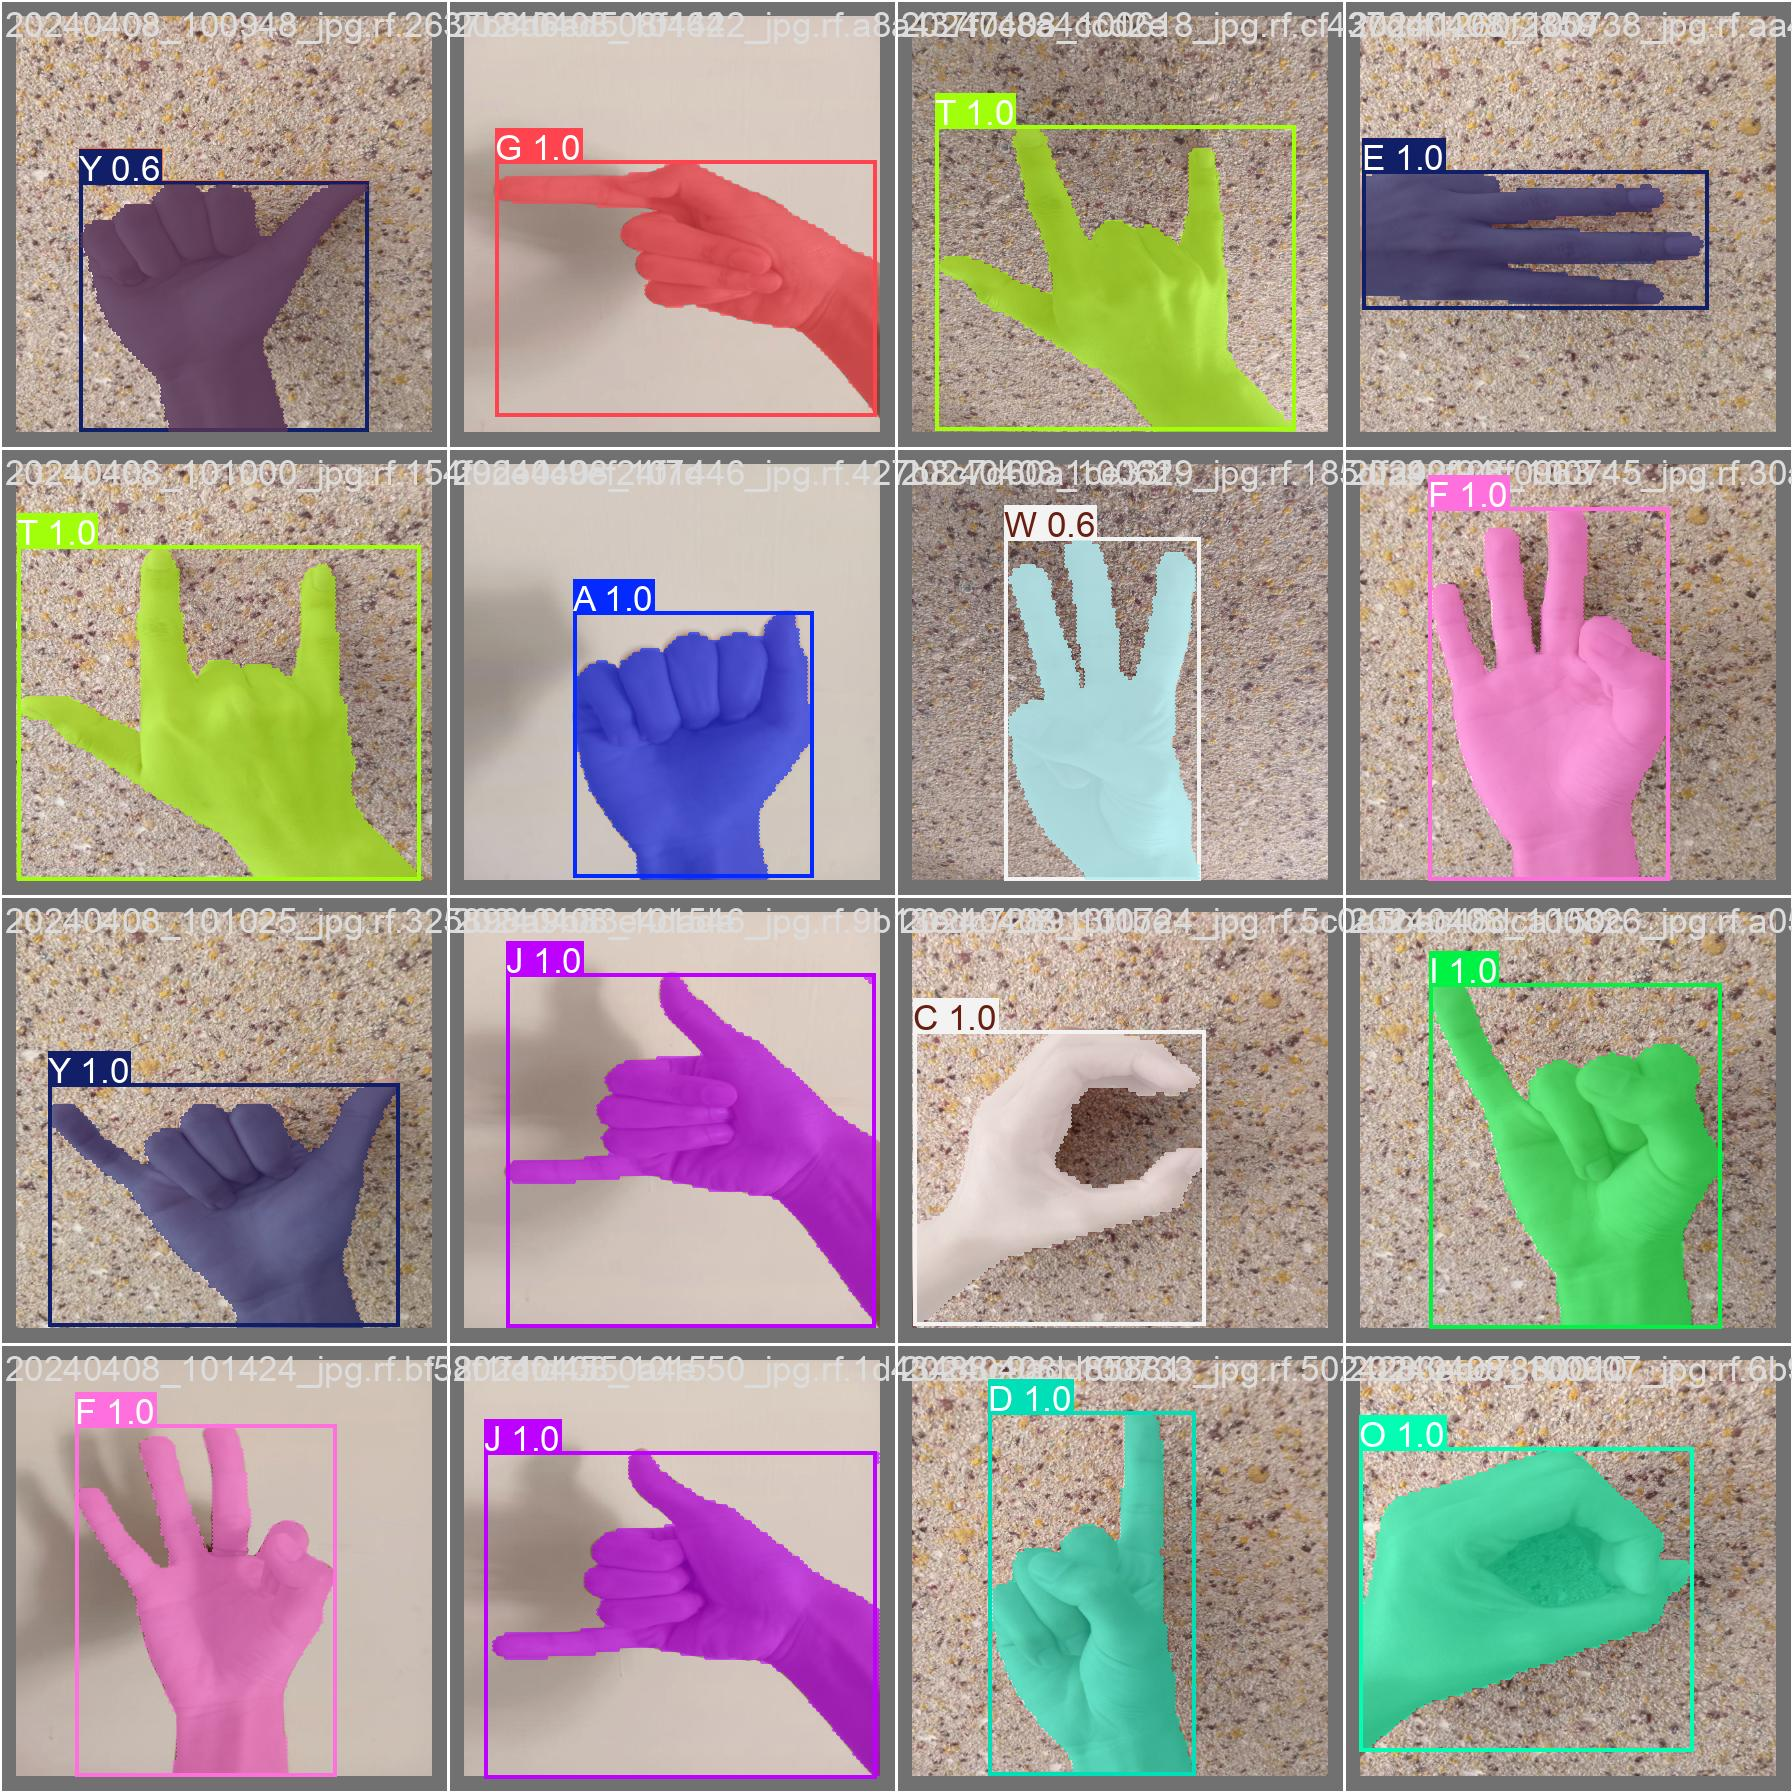

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
Image(filename=f"/content/runs/segment/train/val_batch1_pred.jpg", height=600)

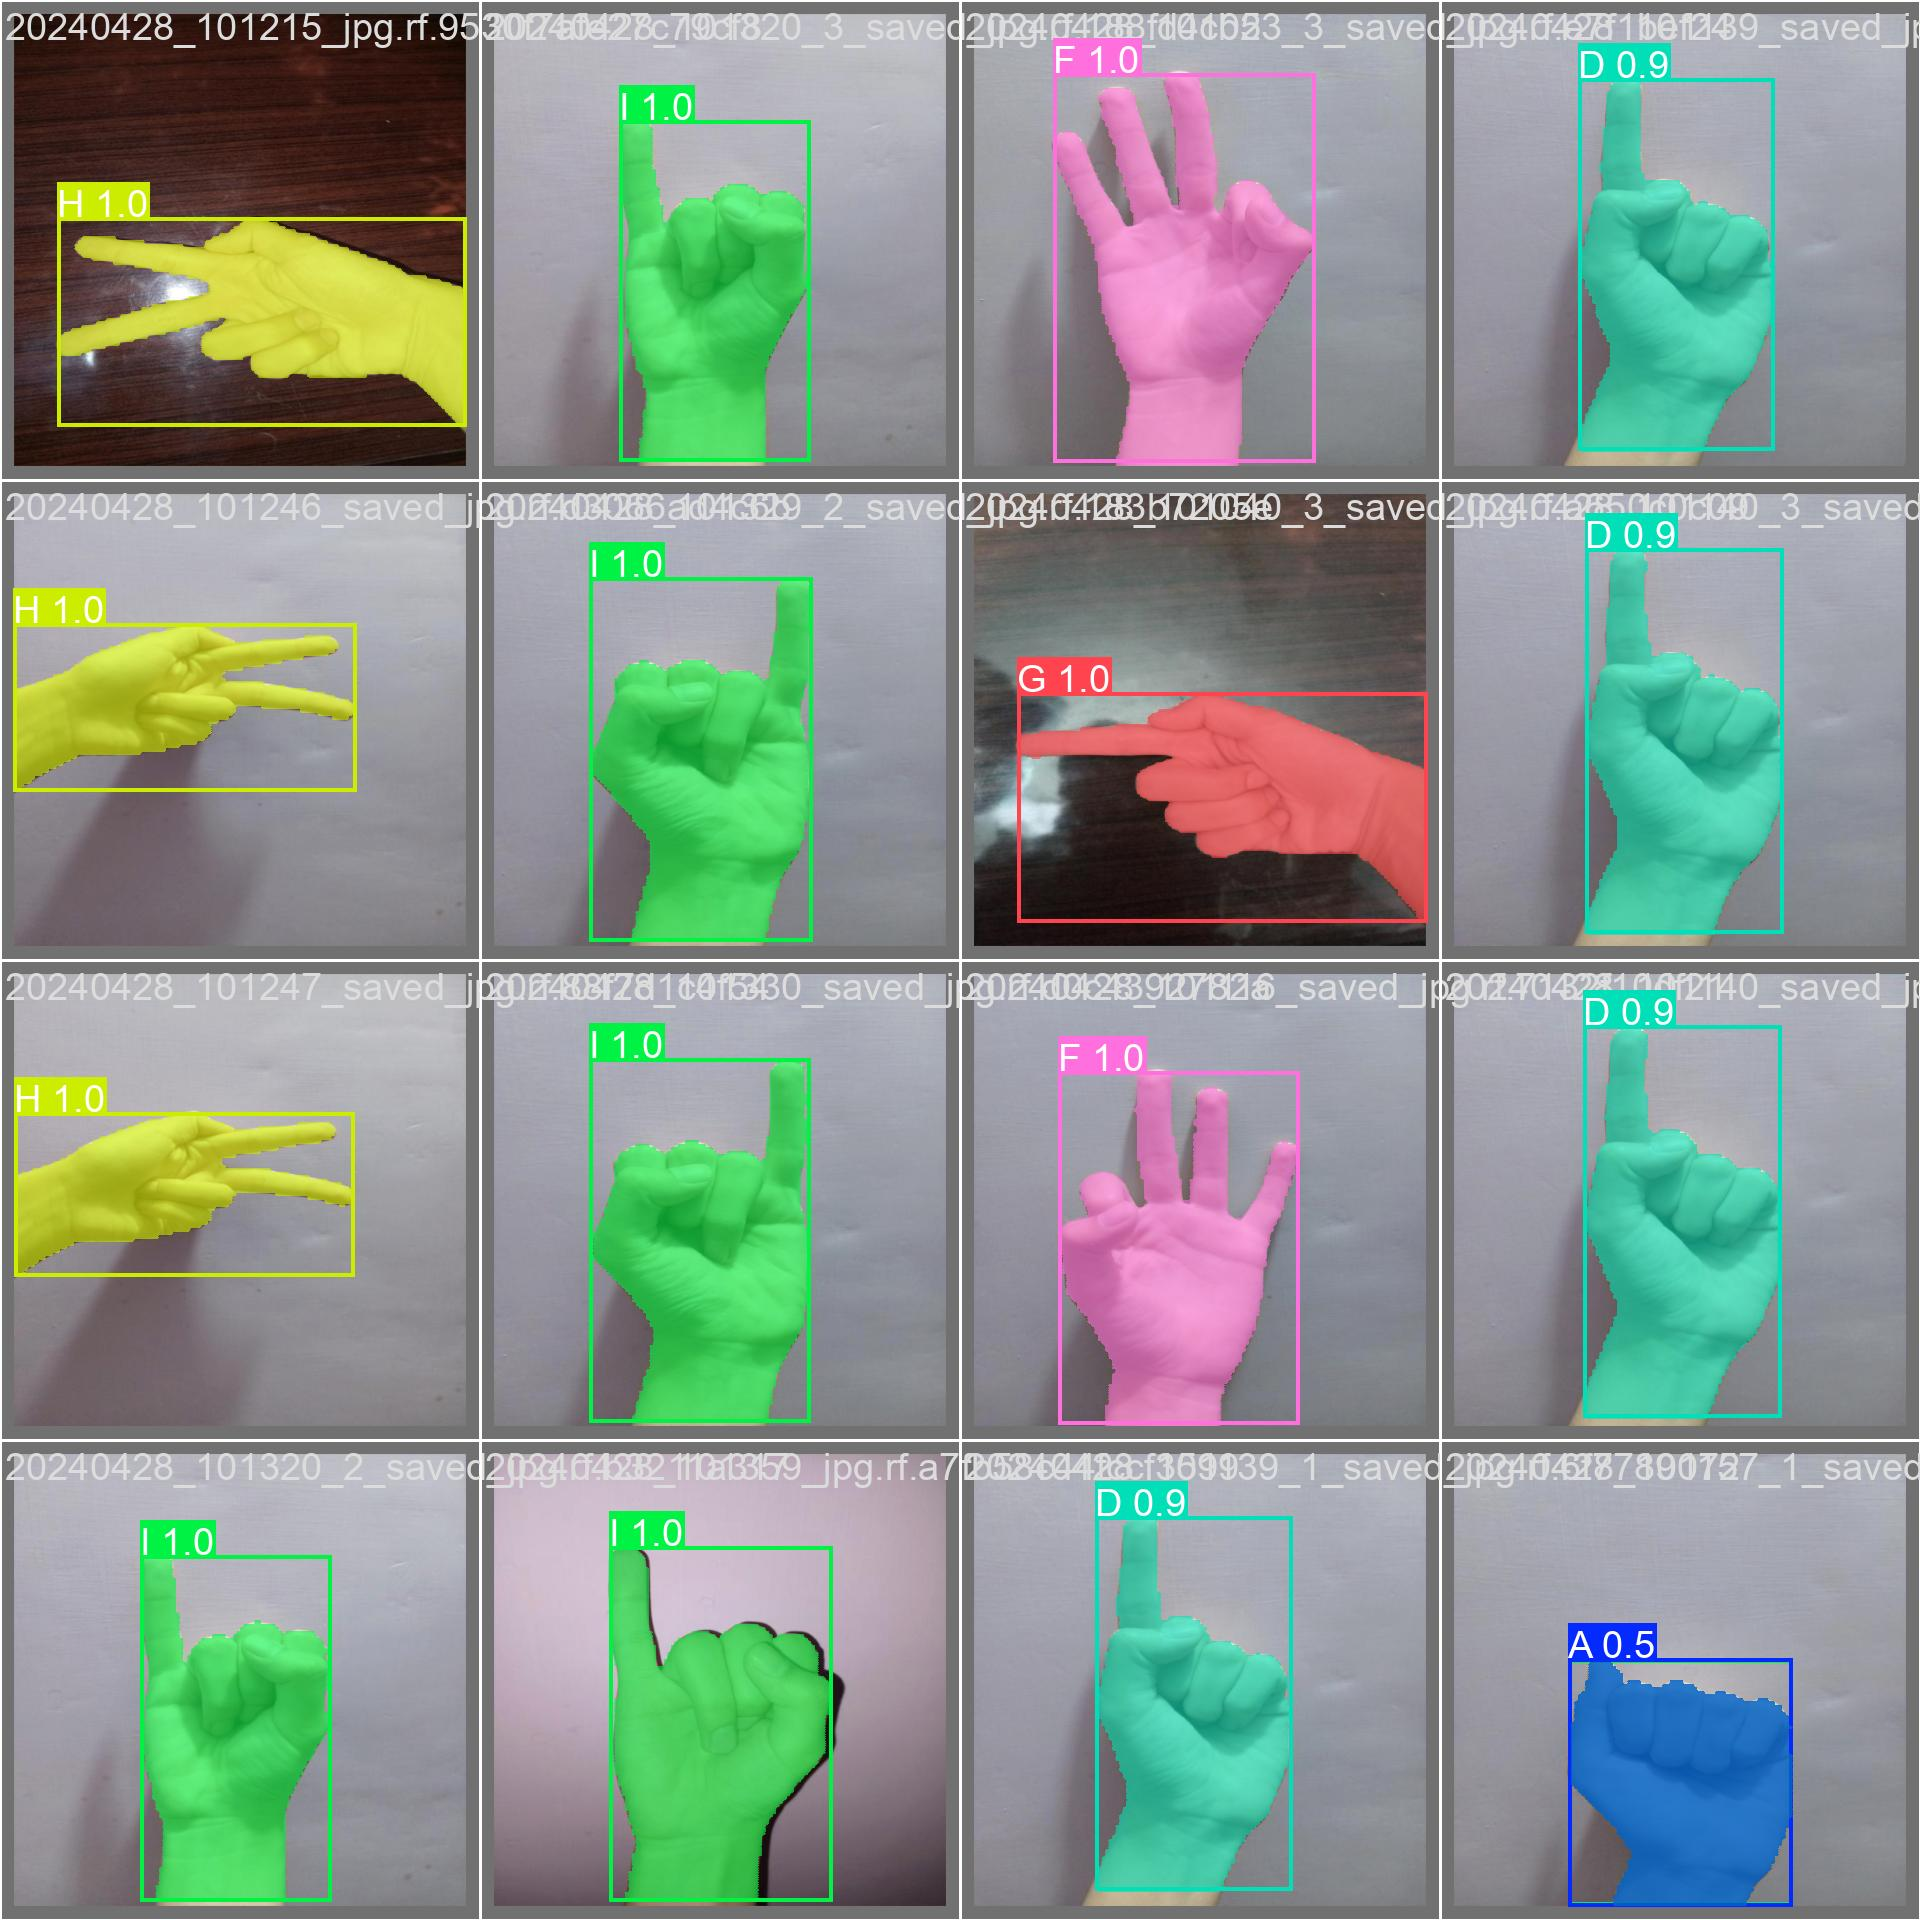

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
Image(filename=f"/content/runs/segment/train2/val_batch1_pred.jpg", height=600)

In [ ]:
import os
from ultralytics import YOLO
from glob import glob

# Directory containing test images
test_images_dir = "/content/Sign-Language-of-Alphabets-4/test/images/"

# Get a list of image file paths
image_paths = glob(os.path.join(test_images_dir, "*.jpg"))[30:50]

# Ensure the output directory exists
output_dir = "/content/output/"
os.makedirs(output_dir, exist_ok=True)

# Run inference on each image
for image_path in image_paths:
    results = model.predict(image_path)

    # Process each result (since results is a list)
    for i, result in enumerate(results):
        # Display the result
        result.show()

        # Save the result to a file
        output_filename = os.path.splitext(os.path.basename(image_path))[0] + f"_result_{i}.jpg"
        output_path = os.path.join(output_dir, output_filename)
        result.save(output_path)


image 1/1 /content/Sign-Language-of-Alphabets-4/test/images/IMG-20240427-WA2214_jpg.rf.fe9449b59ac97762423723d2135b5cad.jpg: 416x416 1 D, 1 V, 36.4ms
Speed: 16.4ms preprocess, 36.4ms inference, 1098.9ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /content/Sign-Language-of-Alphabets-4/test/images/IMG-20240427-WA1559_jpg.rf.b66a8fc667ce729a5aa80be8e900eace.jpg: 416x416 1 Z, 42.6ms
Speed: 2.4ms preprocess, 42.6ms inference, 3.8ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /content/Sign-Language-of-Alphabets-4/test/images/IMG-20240427-WA1662_jpg.rf.8e04415b956d379a6eb797b6e75fd9f1.jpg: 416x416 1 D, 36.7ms
Speed: 2.1ms preprocess, 36.7ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /content/Sign-Language-of-Alphabets-4/test/images/IMG-20240427-WA1689_jpg.rf.f1d8f549c5530ada2638e9ba11cc3a3a.jpg: 416x416 1 A, 41.5ms
Speed: 5.2ms preprocess, 41.5ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /content

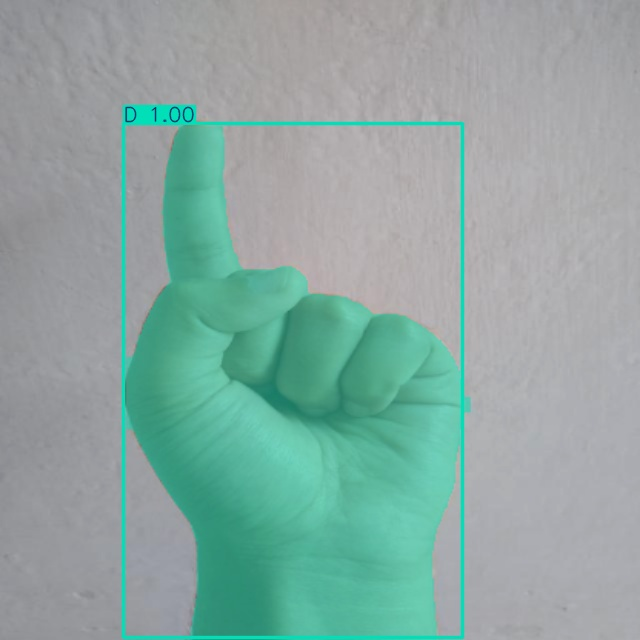

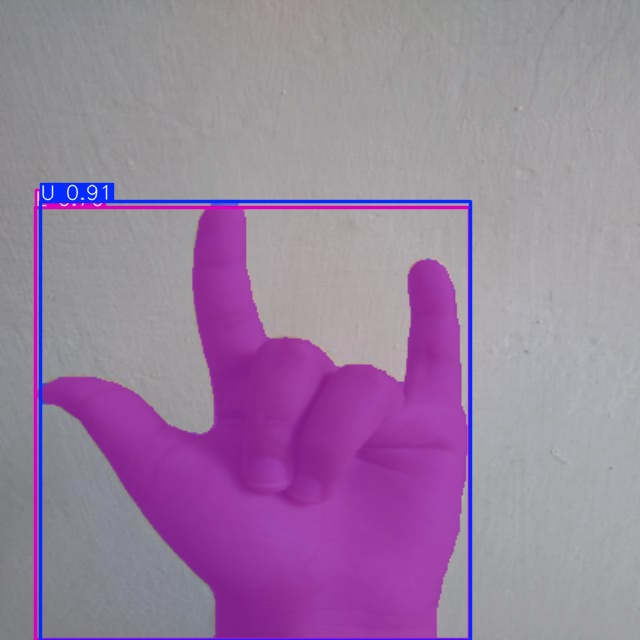

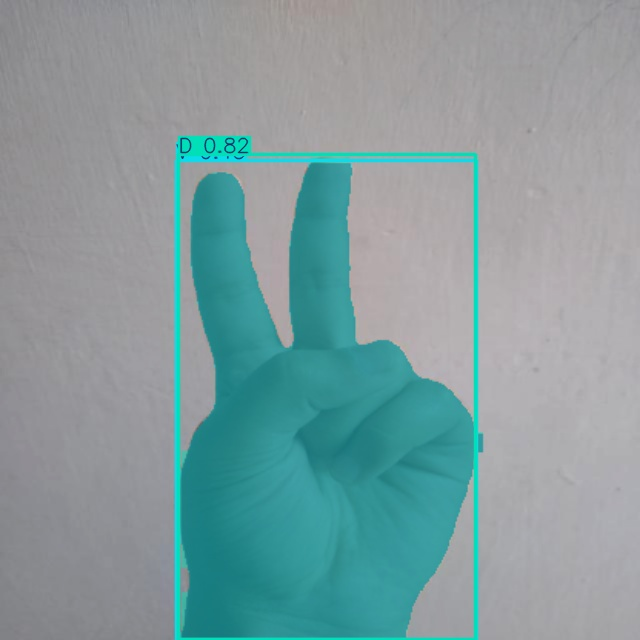

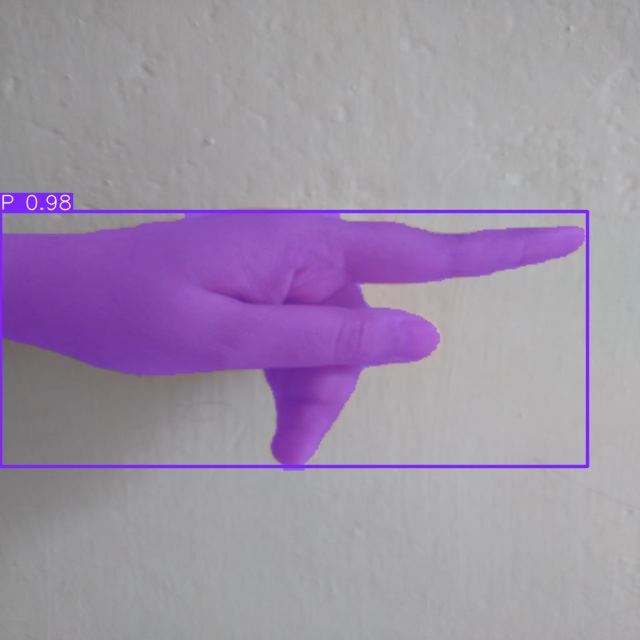

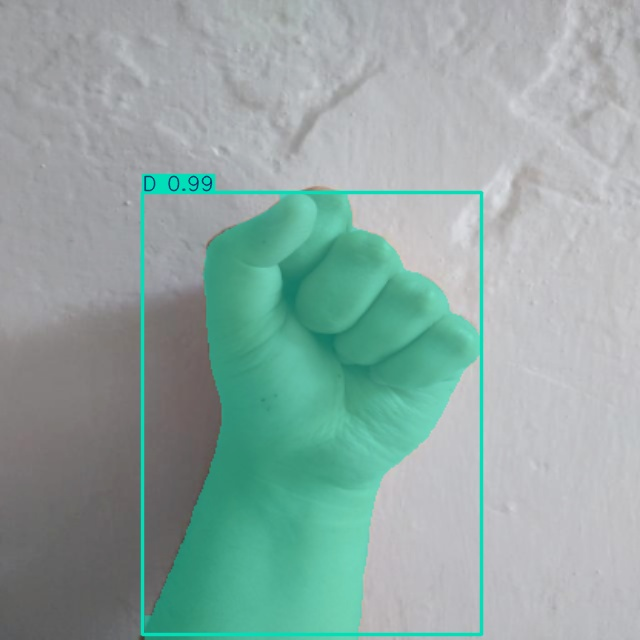

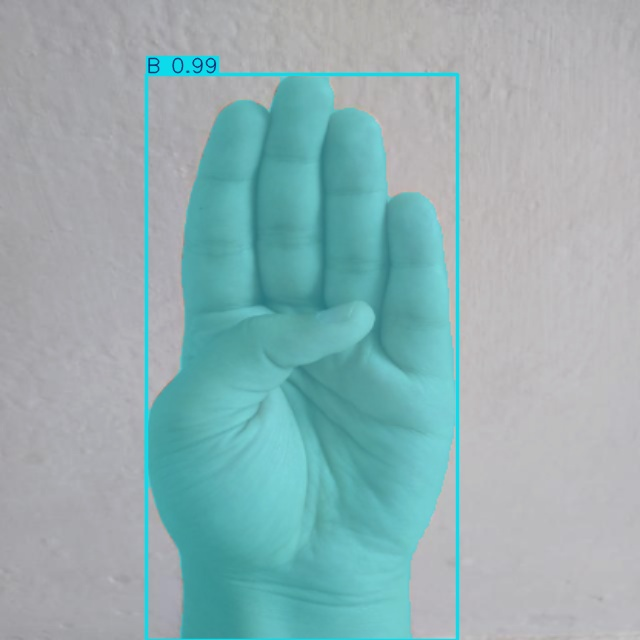

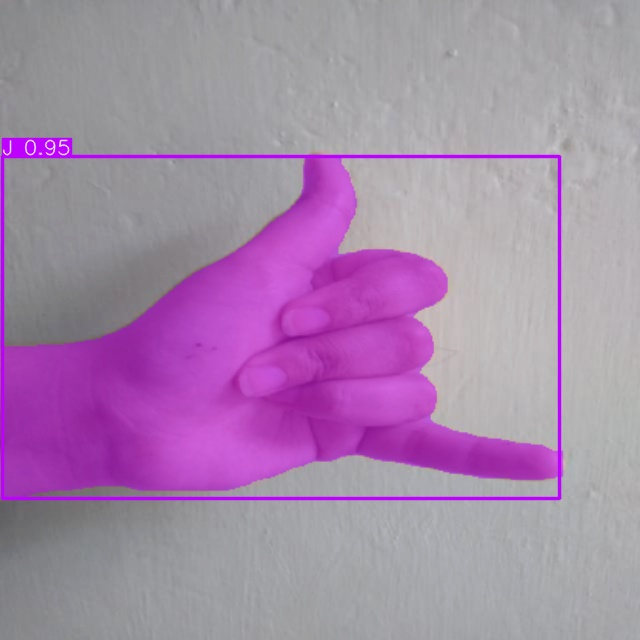

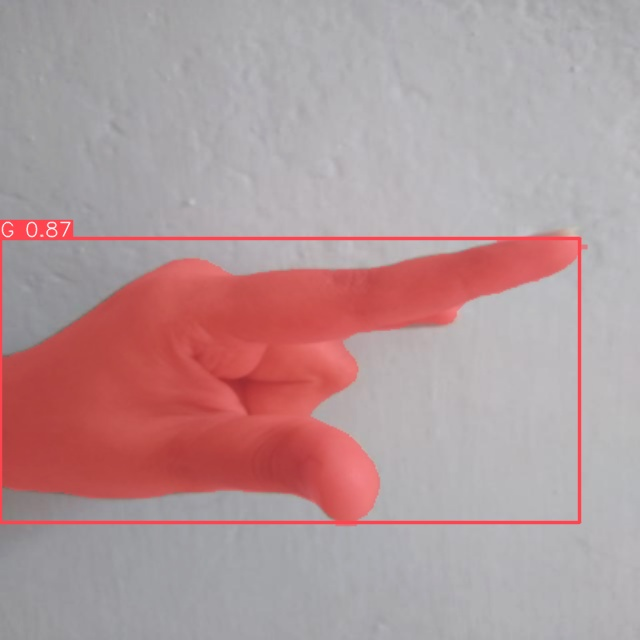

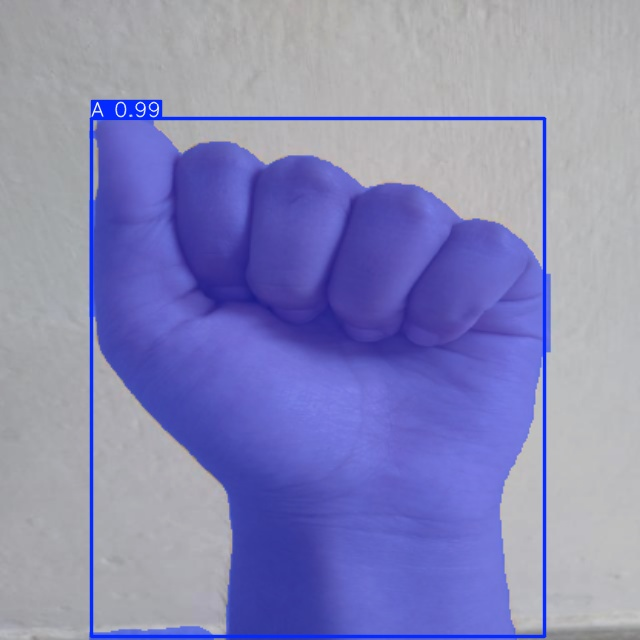

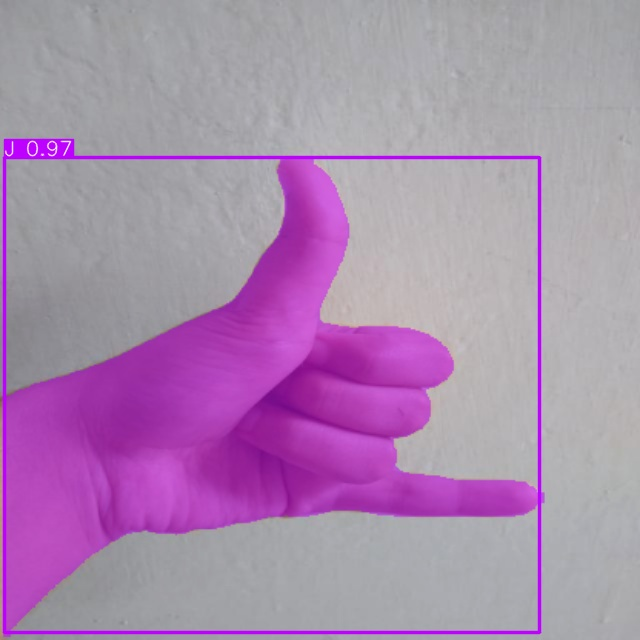

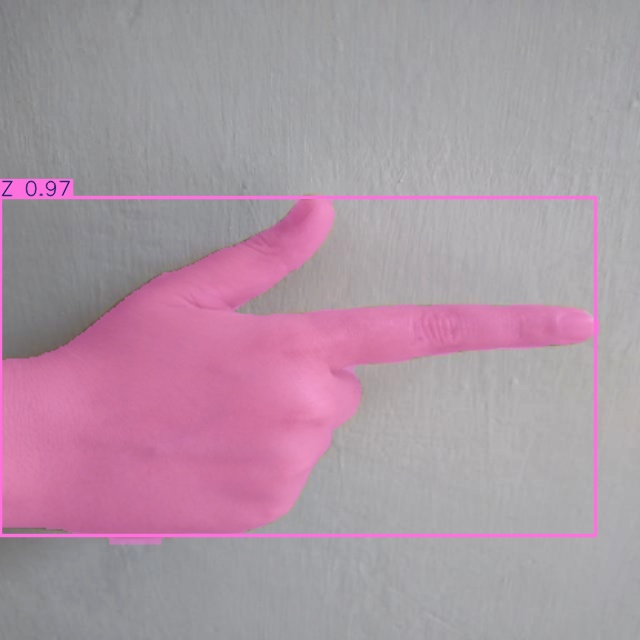

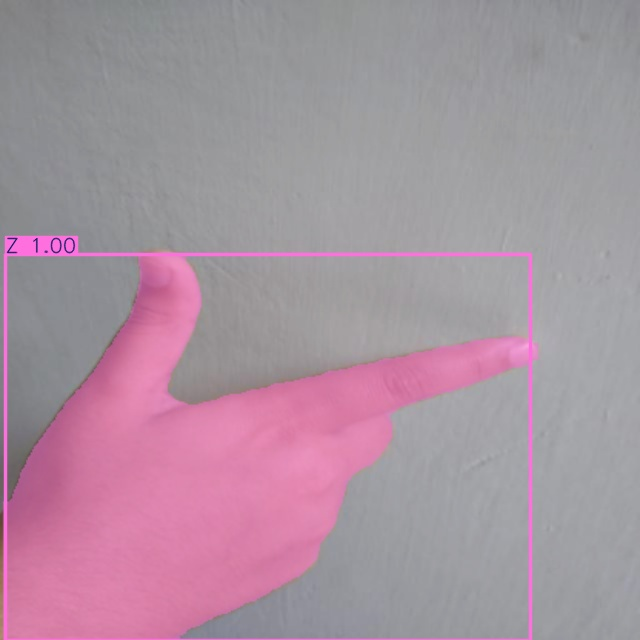

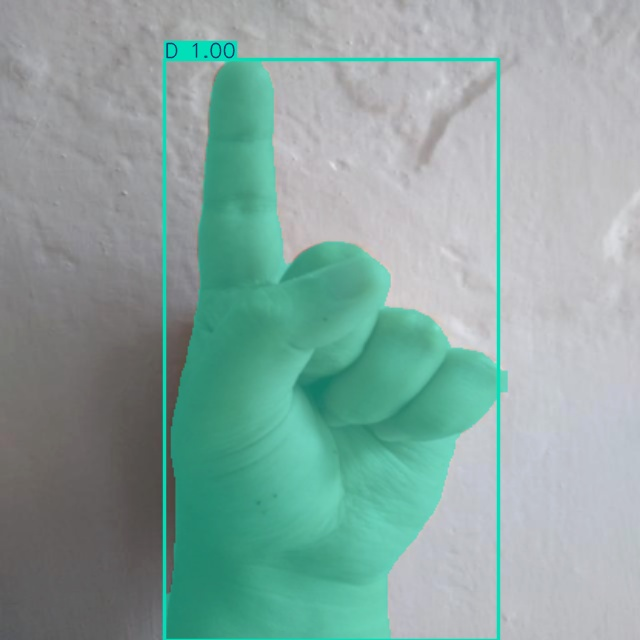

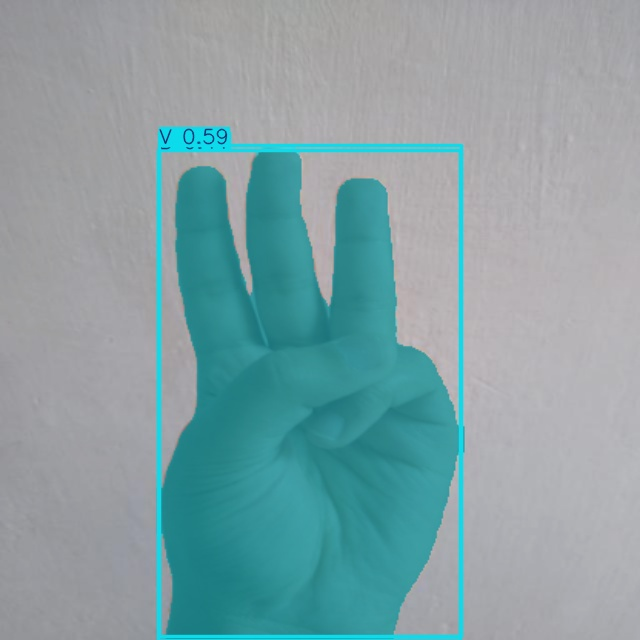

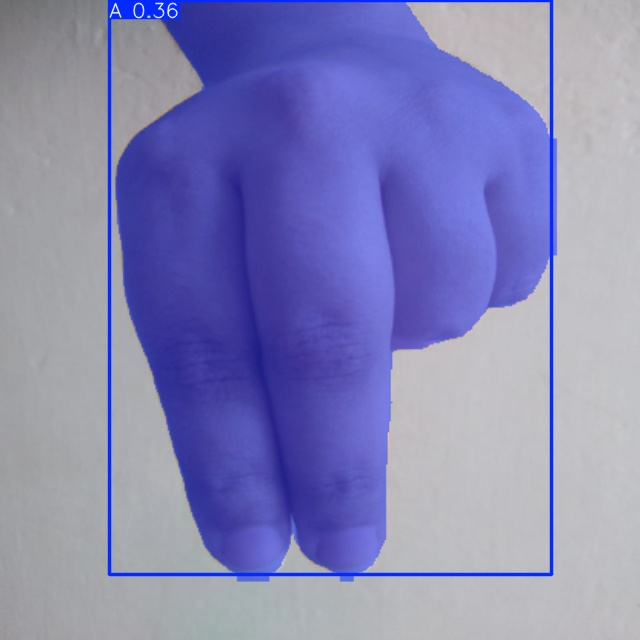

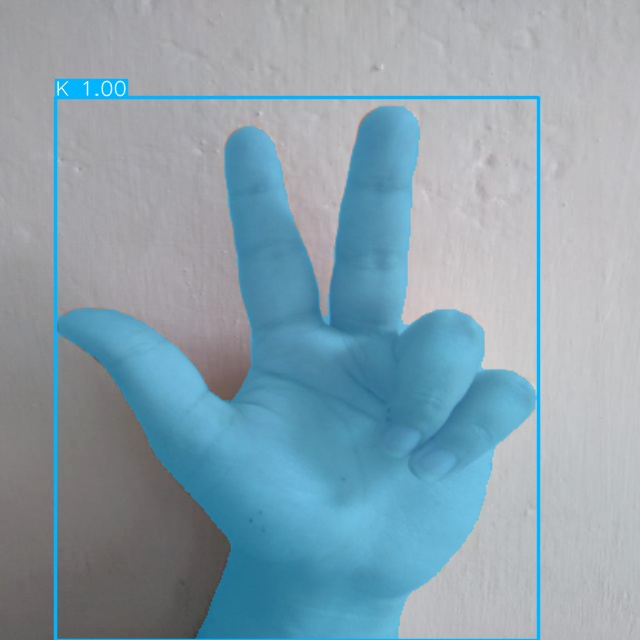

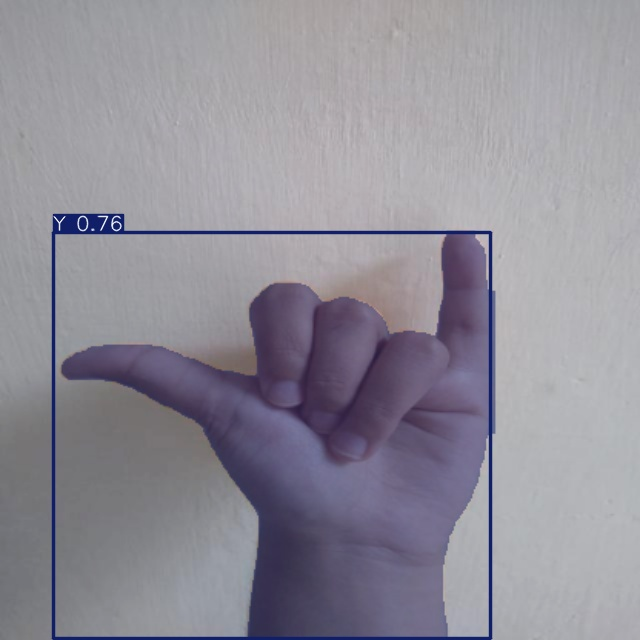

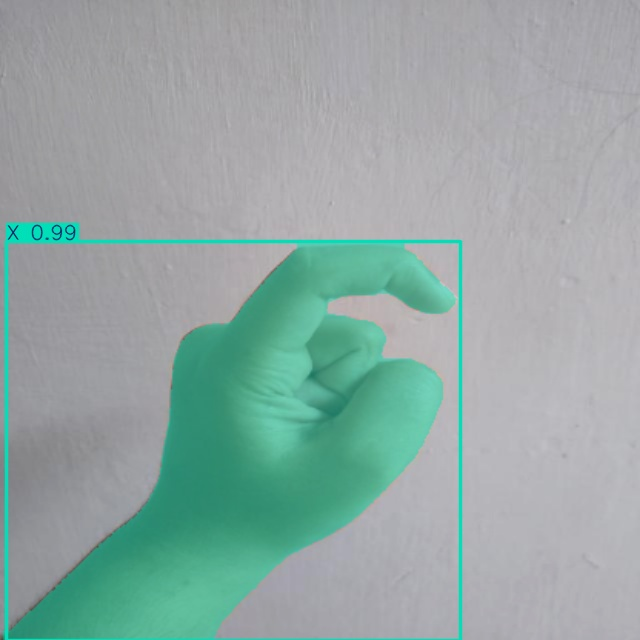

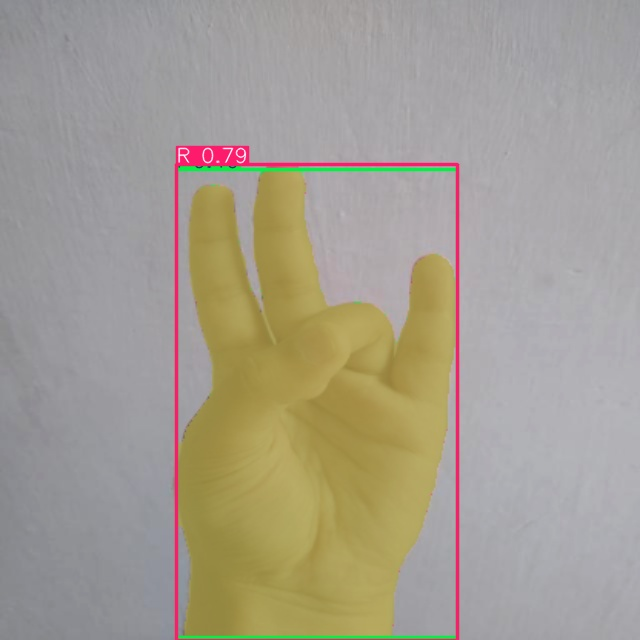

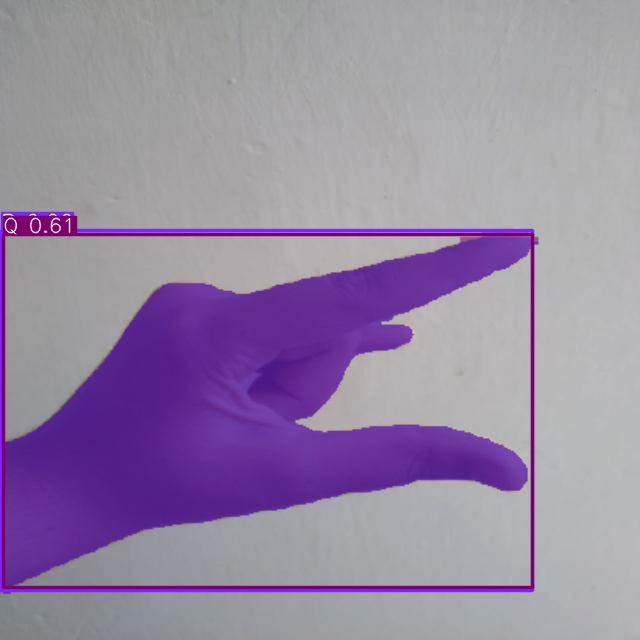

In [ ]:
from IPython.display import Image, display
import os

# Directory containing output images
output_dir = "/content/output/"

# Iterate over each file in the output directory
for filename in os.listdir(output_dir):
    if filename.endswith(".jpg"):  # Assuming all images are JPEG format
        # Display the image
        display(Image(filename=os.path.join(output_dir, filename), height=600))

In [ ]:
import os
from ultralytics import YOLO
from glob import glob

# Directory containing test images
test_images_dir = "/content/Sign-Language-of-Alphabets-4/test/images/"

# Get a list of image file paths
image_paths = glob(os.path.join(test_images_dir, "*.jpg"))[30:50]

# Ensure the output directory exists
output_dir = "/content/output2/"
os.makedirs(output_dir, exist_ok=True)

# Run inference on each image
for image_path in image_paths:
    results = model2.predict(image_path)

    # Process each result (since results is a list)
    for i, result in enumerate(results):
        # Display the result
        result.show()

        # Save the result to a file
        output_filename = os.path.splitext(os.path.basename(image_path))[0] + f"_result_{i}.jpg"
        output_path = os.path.join(output_dir, output_filename)
        result.save(output_path)


image 1/1 /content/Sign-Language-of-Alphabets-4/test/images/IMG-20240427-WA2214_jpg.rf.fe9449b59ac97762423723d2135b5cad.jpg: 512x512 1 V, 42.3ms
Speed: 2.6ms preprocess, 42.3ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /content/Sign-Language-of-Alphabets-4/test/images/IMG-20240427-WA1559_jpg.rf.b66a8fc667ce729a5aa80be8e900eace.jpg: 512x512 1 Z, 42.4ms
Speed: 1.9ms preprocess, 42.4ms inference, 1.8ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /content/Sign-Language-of-Alphabets-4/test/images/IMG-20240427-WA1662_jpg.rf.8e04415b956d379a6eb797b6e75fd9f1.jpg: 512x512 1 D, 43.0ms
Speed: 3.8ms preprocess, 43.0ms inference, 1.8ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /content/Sign-Language-of-Alphabets-4/test/images/IMG-20240427-WA1689_jpg.rf.f1d8f549c5530ada2638e9ba11cc3a3a.jpg: 512x512 1 I, 42.8ms
Speed: 3.2ms preprocess, 42.8ms inference, 1.9ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /content/Sign-Lan

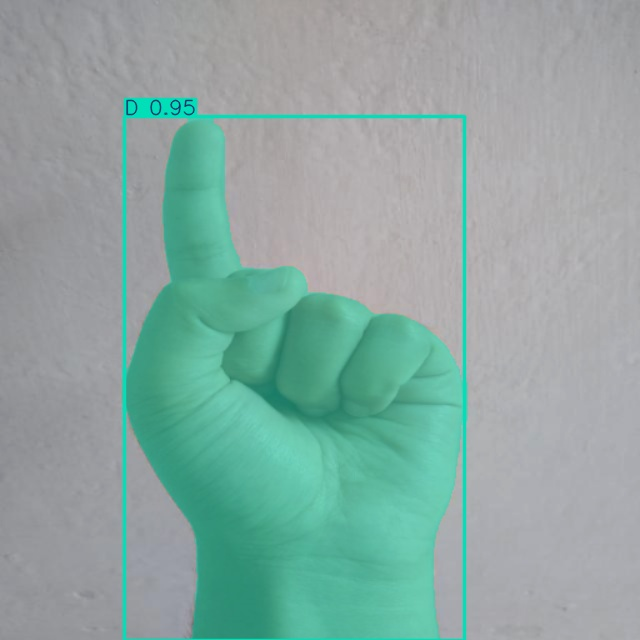

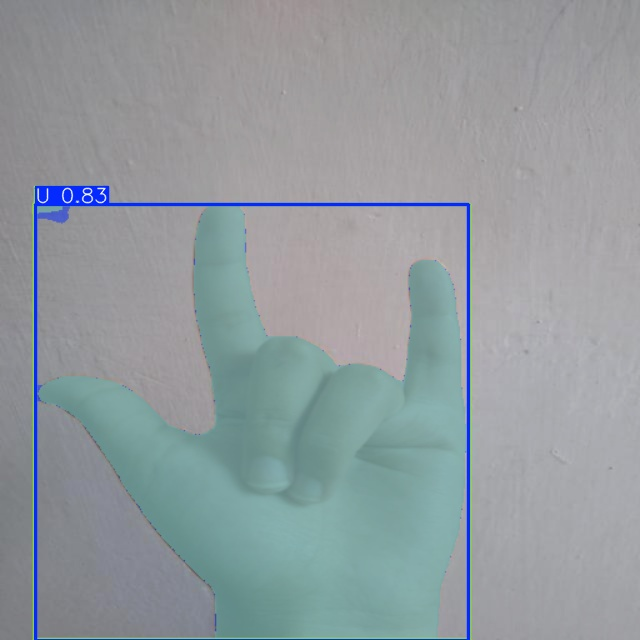

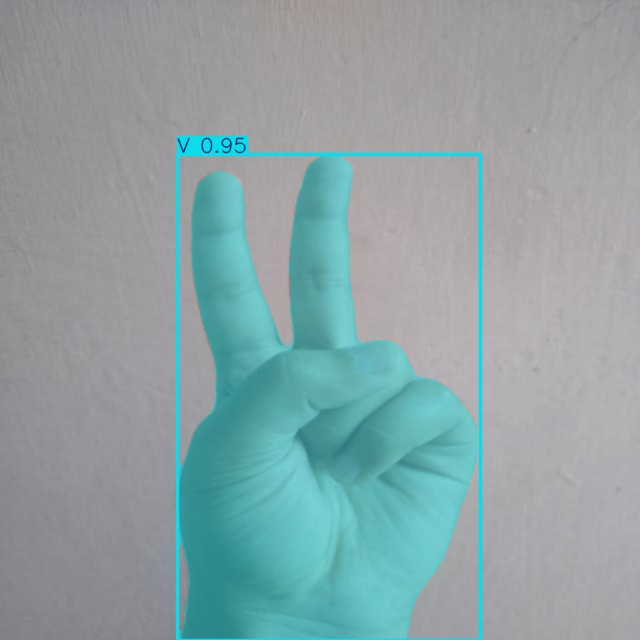

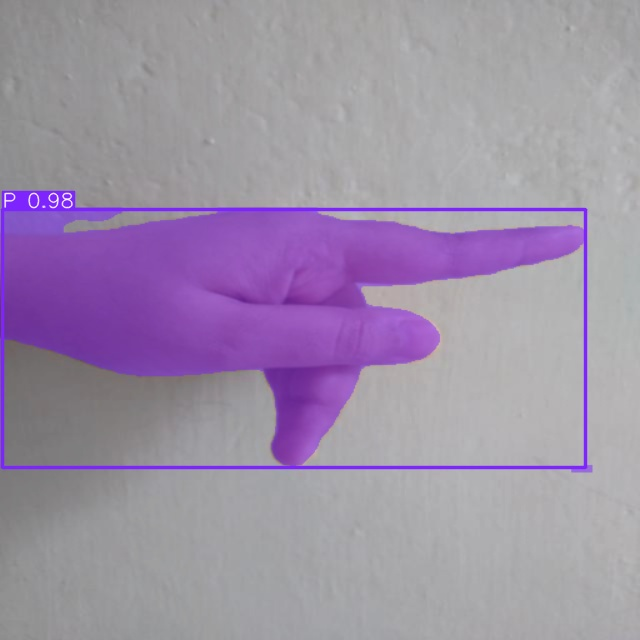

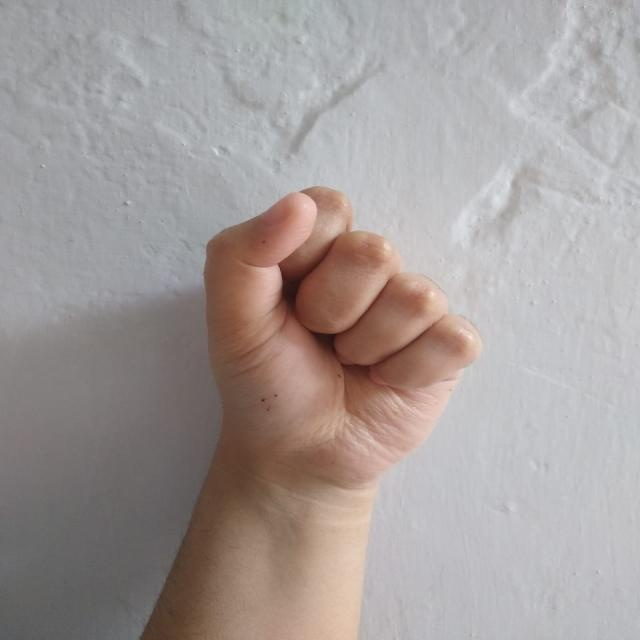

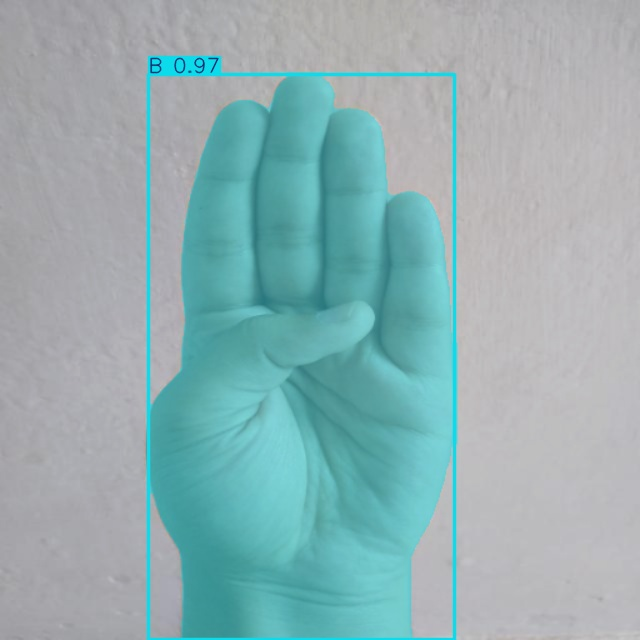

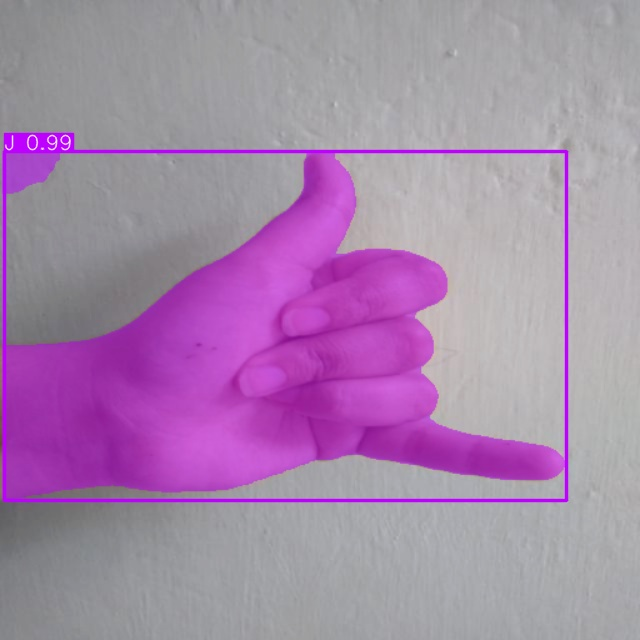

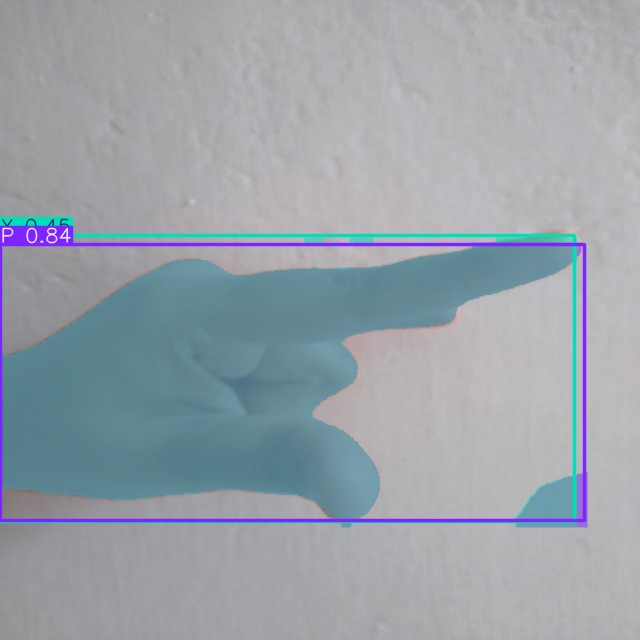

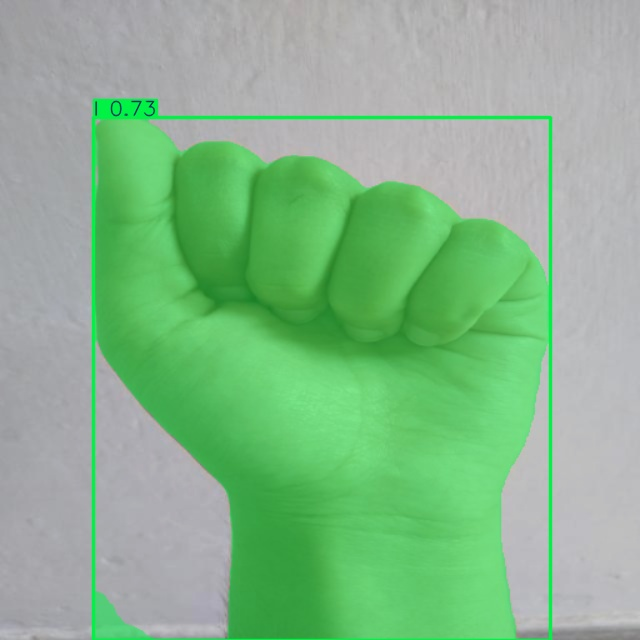

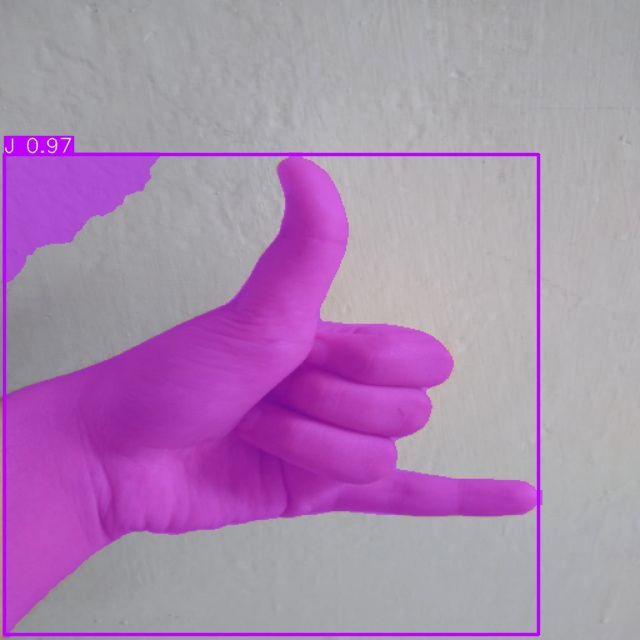

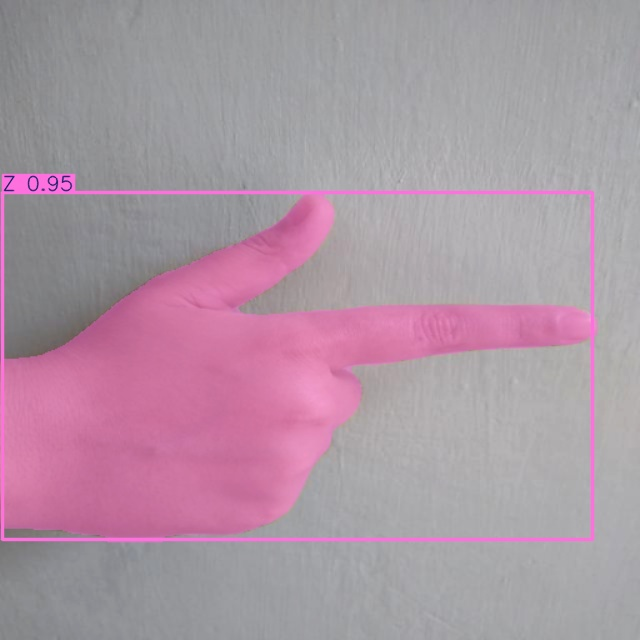

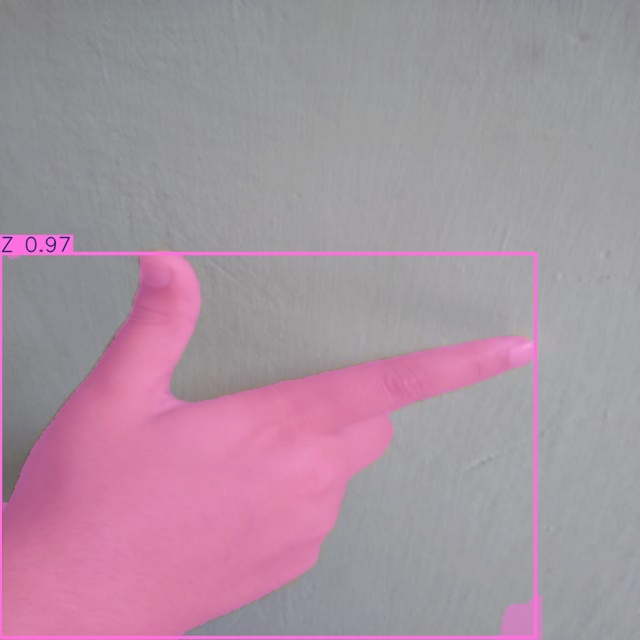

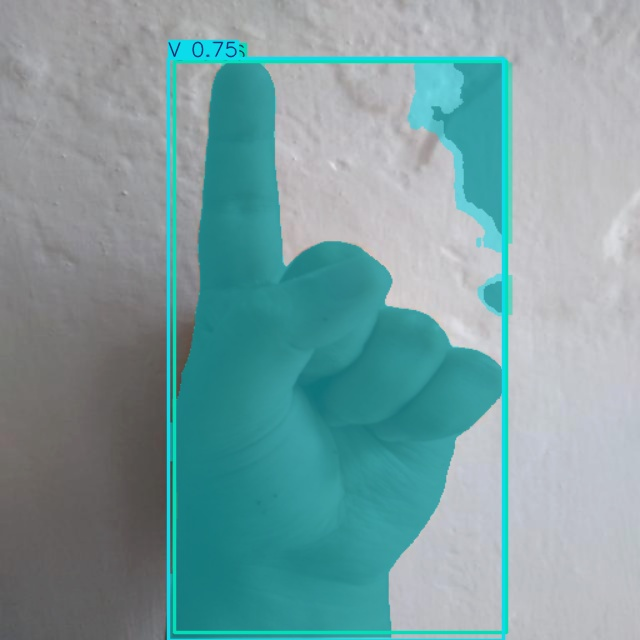

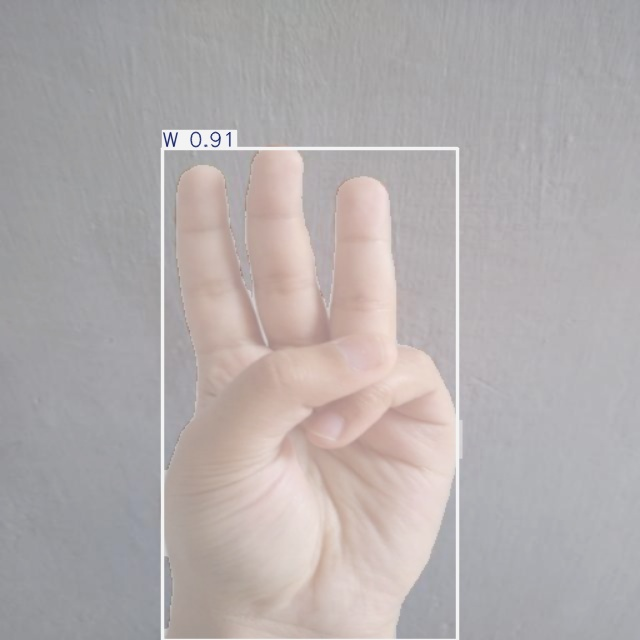

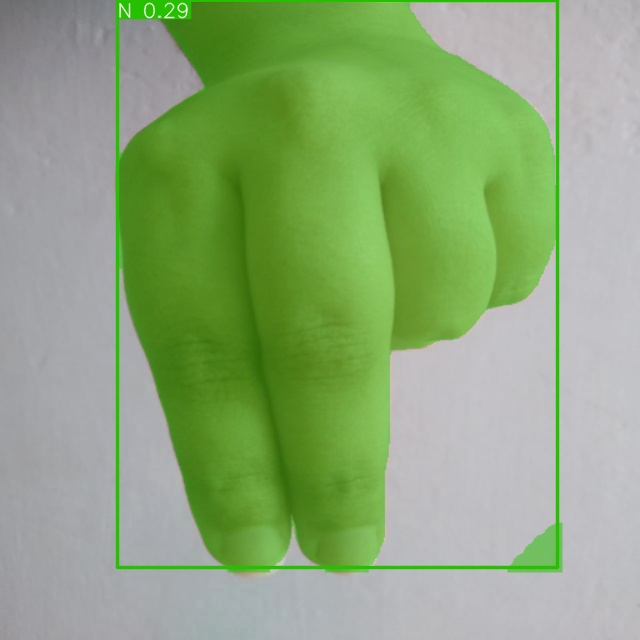

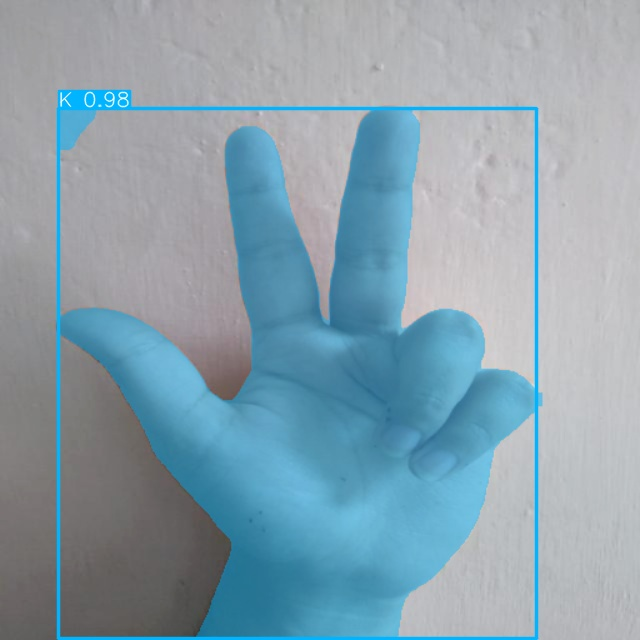

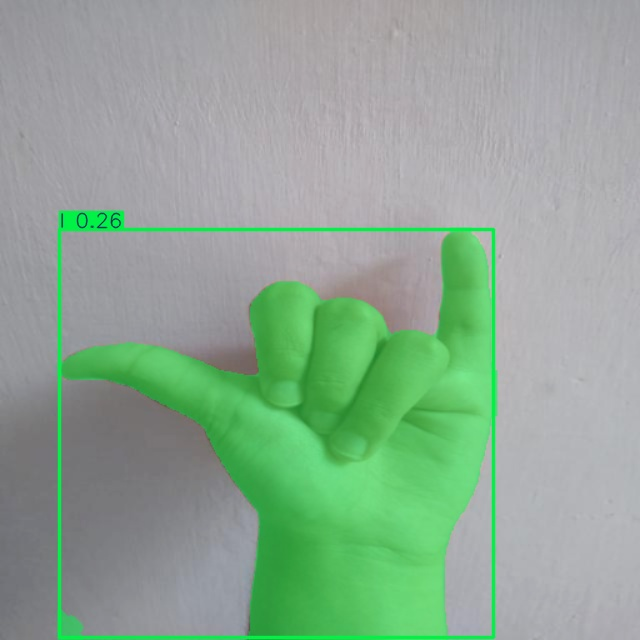

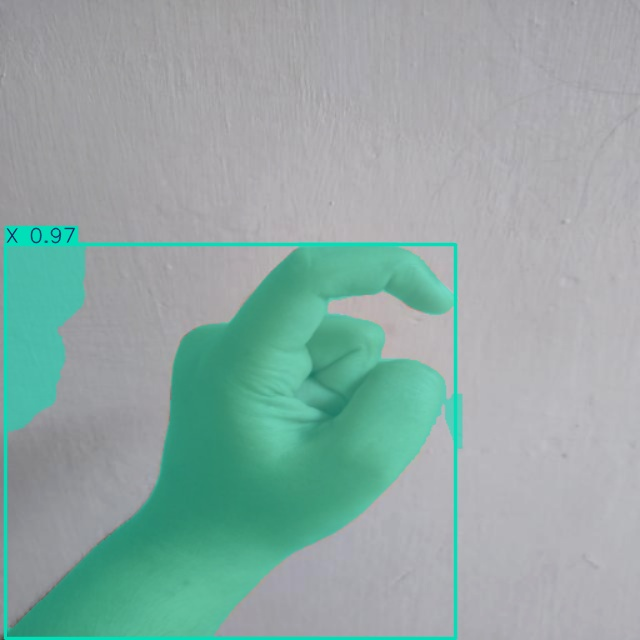

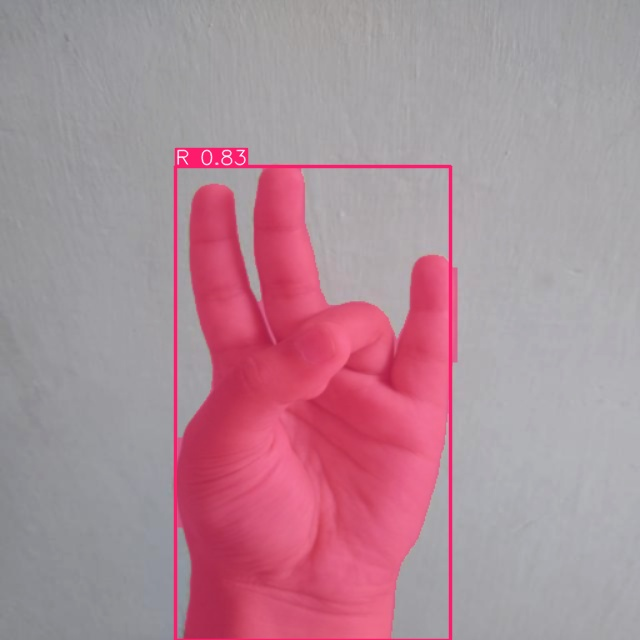

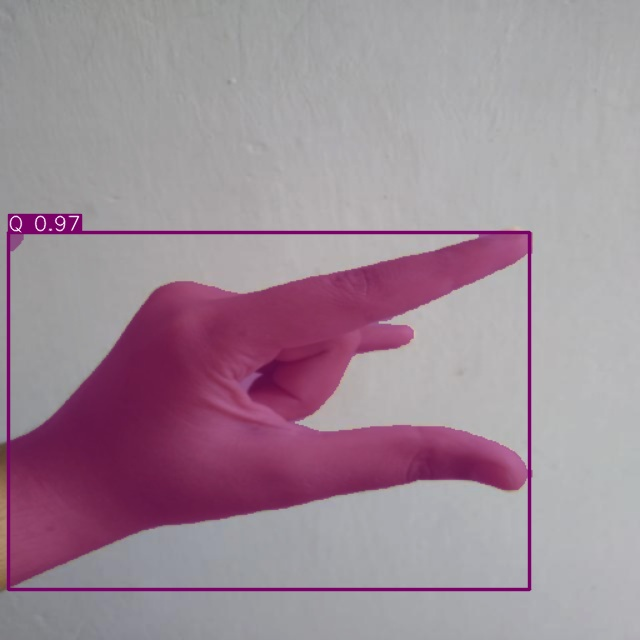

In [ ]:
from IPython.display import Image, display
import os

# Directory containing output images
output_dir = "/content/output2/"

# Iterate over each file in the output directory
for filename in os.listdir(output_dir):
    if filename.endswith(".jpg"):  # Assuming all images are JPEG format
        # Display the image
        display(Image(filename=os.path.join(output_dir, filename), height=600, width=600))

In [ ]:
import os
from ultralytics import YOLO
from glob import glob

# Directory containing test images
test_images_dir = "/content/Sign-Language-of-Alphabets-4/test/images/"

# Get a list of image file paths
image_paths = glob(os.path.join(test_images_dir, "*.jpg"))[10:20]

# Ensure the output directory exists
output_dir = "/content/output3/"
os.makedirs(output_dir, exist_ok=True)

# Run inference on each image
for image_path in image_paths:
    results = model3.predict(image_path)

    # Process each result (since results is a list)
    for i, result in enumerate(results):
        # Display the result
        result.show()

        # Save the result to a file
        output_filename = os.path.splitext(os.path.basename(image_path))[0] + f"_result_{i}.jpg"
        output_path = os.path.join(output_dir, output_filename)
        result.save(output_path)


image 1/1 /content/Sign-Language-of-Alphabets-4/test/images/IMG-20240427-WA1134_jpg.rf.ada4491382c7895cc13c50bf56518626.jpg: 608x608 1 G, 1 H, 60.7ms
Speed: 4.0ms preprocess, 60.7ms inference, 2.9ms postprocess per image at shape (1, 3, 608, 608)

image 1/1 /content/Sign-Language-of-Alphabets-4/test/images/IMG-20240427-WA1673_jpg.rf.28975e948ef586378849a0c4efc26cf8.jpg: 608x608 2 Bs, 60.9ms
Speed: 3.5ms preprocess, 60.9ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 608)

image 1/1 /content/Sign-Language-of-Alphabets-4/test/images/IMG-20240427-WA1317_jpg.rf.0d587010cc0ac30adaa524a6a9354fcd.jpg: 608x608 1 X, 60.8ms
Speed: 3.4ms preprocess, 60.8ms inference, 3.6ms postprocess per image at shape (1, 3, 608, 608)

image 1/1 /content/Sign-Language-of-Alphabets-4/test/images/IMG-20240427-WA1135_jpg.rf.b51bfd1053d884264516187682ea0c73.jpg: 608x608 1 G, 1 H, 60.7ms
Speed: 3.6ms preprocess, 60.7ms inference, 2.8ms postprocess per image at shape (1, 3, 608, 608)

image 1/1 /conte

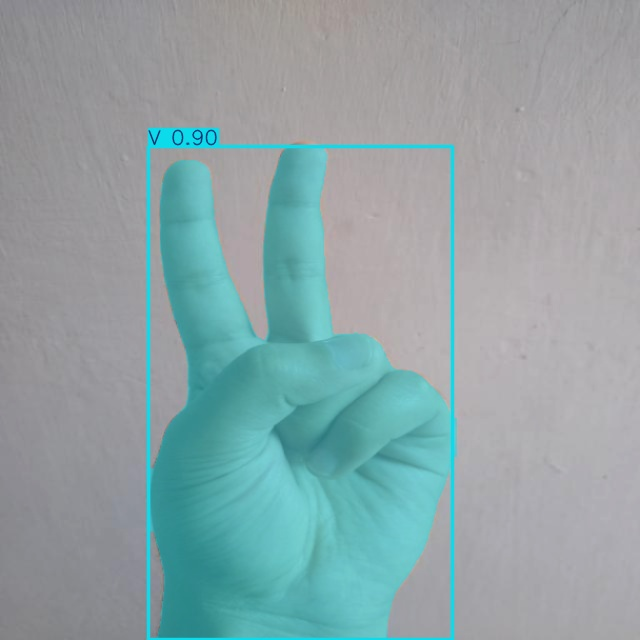

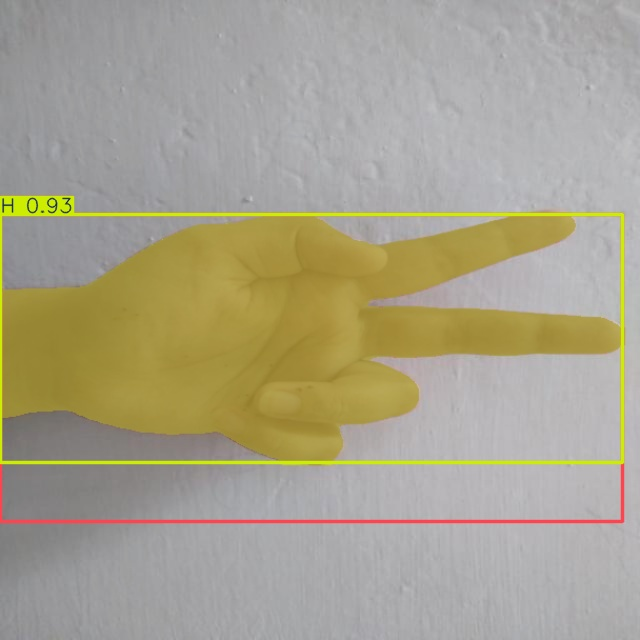

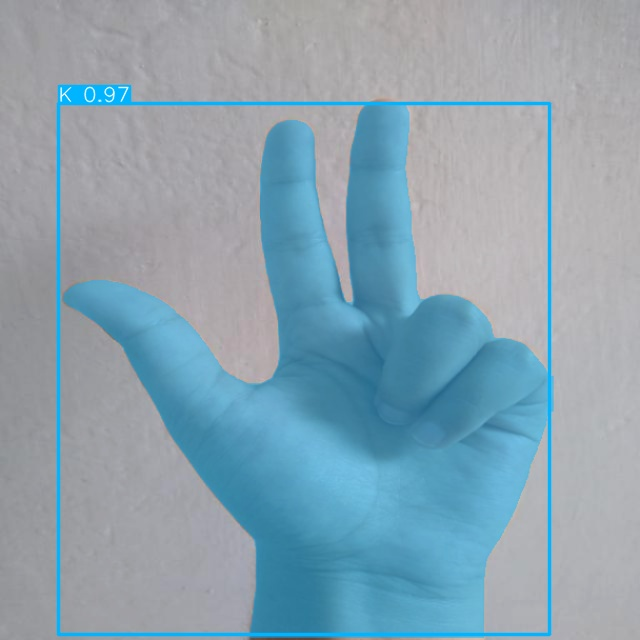

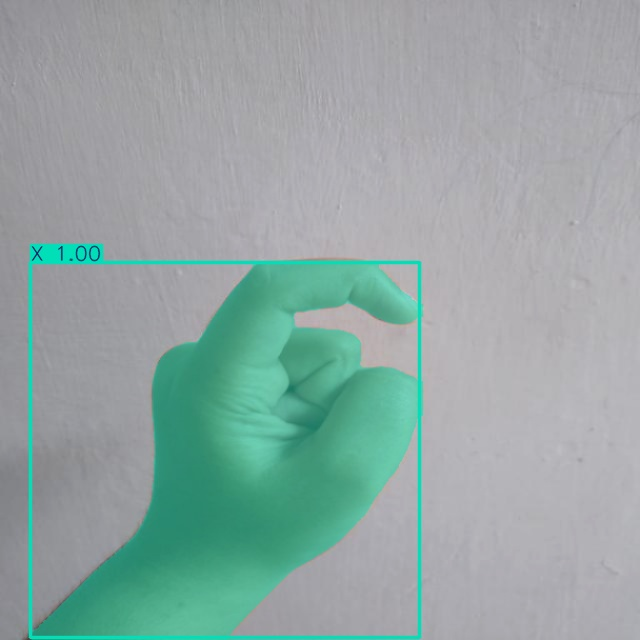

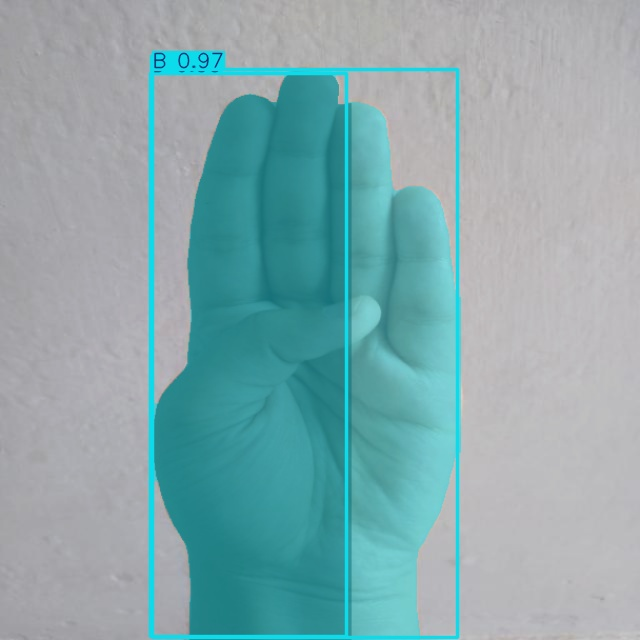

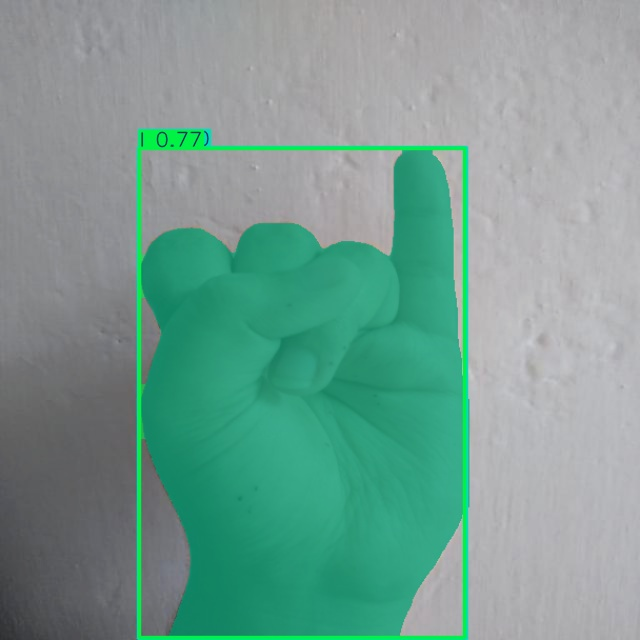

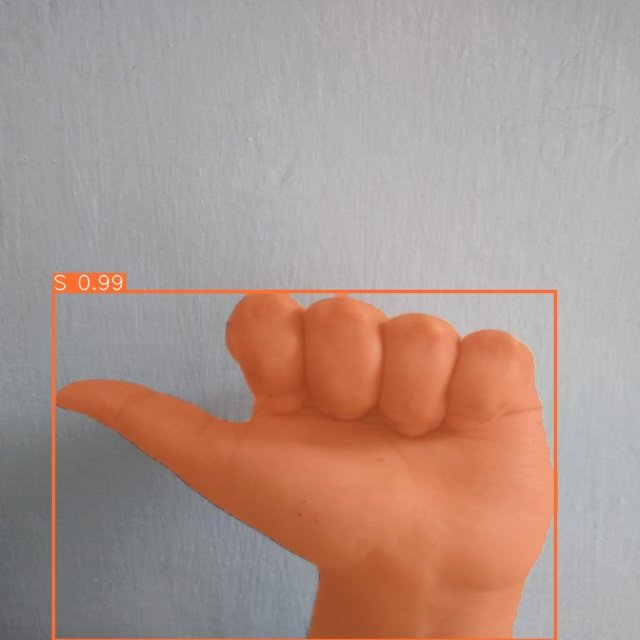

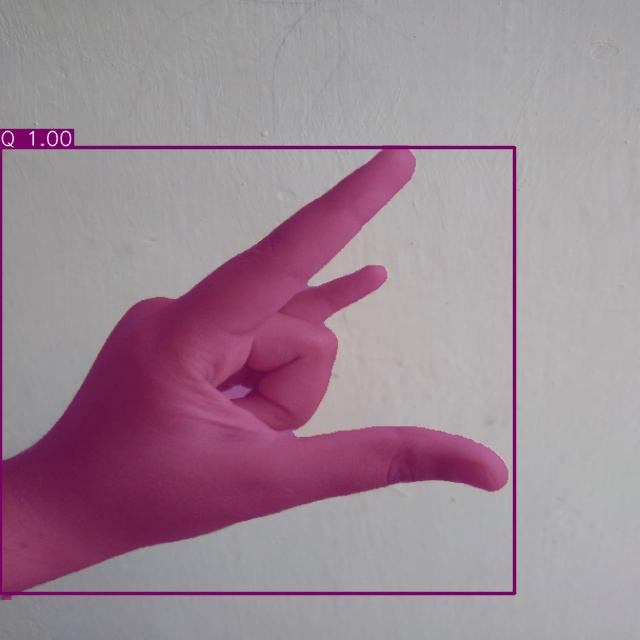

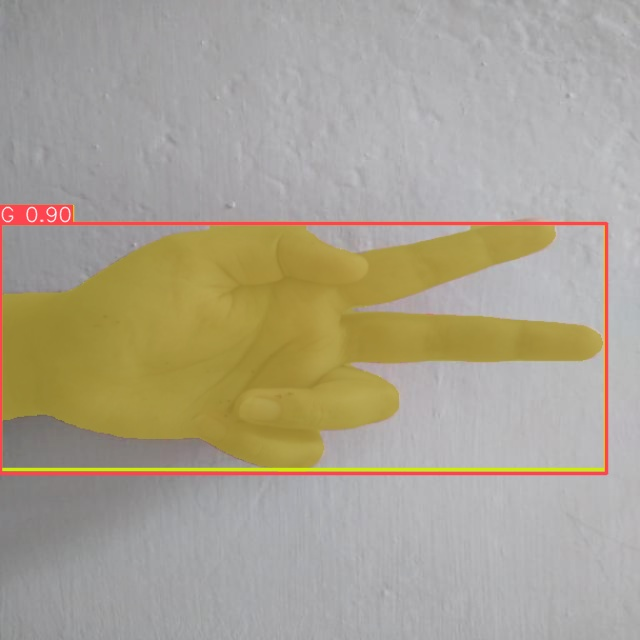

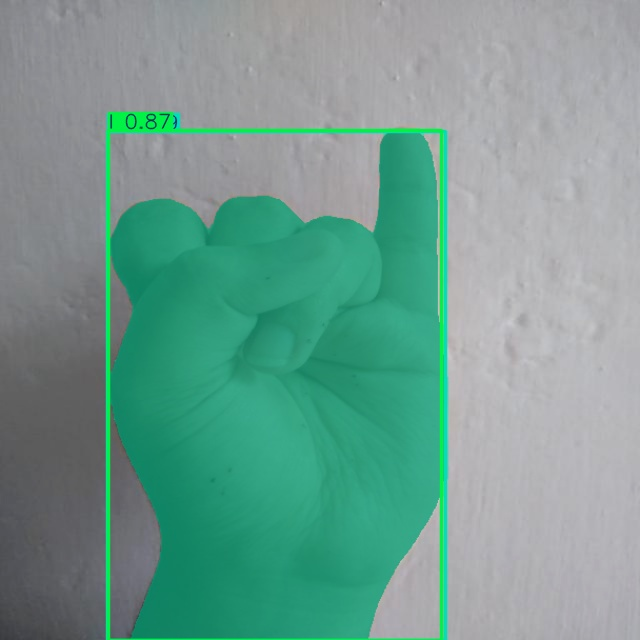

In [ ]:
from IPython.display import Image, display
import os

# Directory containing output images
output_dir = "/content/output3/"

# Iterate over each file in the output directory
for filename in os.listdir(output_dir):
    if filename.endswith(".jpg"):  # Assuming all images are JPEG format
        # Display the image
        display(Image(filename=os.path.join(output_dir, filename), height=600, width=600))

In [ ]:
import os
from ultralytics import YOLO
from glob import glob

# Directory containing test images
test_images_dir = "/content/Sign-Language-of-Alphabets-4/test/images/"

# Get a list of image file paths
image_paths = glob(os.path.join(test_images_dir, "*.jpg"))[15:25]

# Ensure the output directory exists
output_dir = "/content/output4/"
os.makedirs(output_dir, exist_ok=True)

# Run inference on each image
for image_path in image_paths:
    results = model4.predict(image_path)

    # Process each result (since results is a list)
    for i, result in enumerate(results):
        # Display the result
        result.show()

        # Save the result to a file
        output_filename = os.path.splitext(os.path.basename(image_path))[0] + f"_result_{i}.jpg"
        output_path = os.path.join(output_dir, output_filename)
        result.save(output_path)


image 1/1 /content/Sign-Language-of-Alphabets-4/test/images/IMG-20240427-WA1592_jpg.rf.8c61297931e2450f2eda346277b317f9.jpg: 416x416 1 Q, 36.3ms
Speed: 2.2ms preprocess, 36.3ms inference, 2.7ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /content/Sign-Language-of-Alphabets-4/test/images/IMG-20240427-WA1795_jpg.rf.14138f786f19faced9bff9bb3a55c4c9.jpg: 416x416 1 K, 36.3ms
Speed: 1.3ms preprocess, 36.3ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /content/Sign-Language-of-Alphabets-4/test/images/IMG-20240427-WA1374_jpg.rf.4590d98400d76cf5750051afffe4212d.jpg: 416x416 1 S, 36.5ms
Speed: 2.1ms preprocess, 36.5ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /content/Sign-Language-of-Alphabets-4/test/images/IMG-20240427-WA1212_jpg.rf.00559189251f1008790a16699d811f7d.jpg: 416x416 1 I, 36.3ms
Speed: 1.4ms preprocess, 36.3ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /content/Sign-Lan

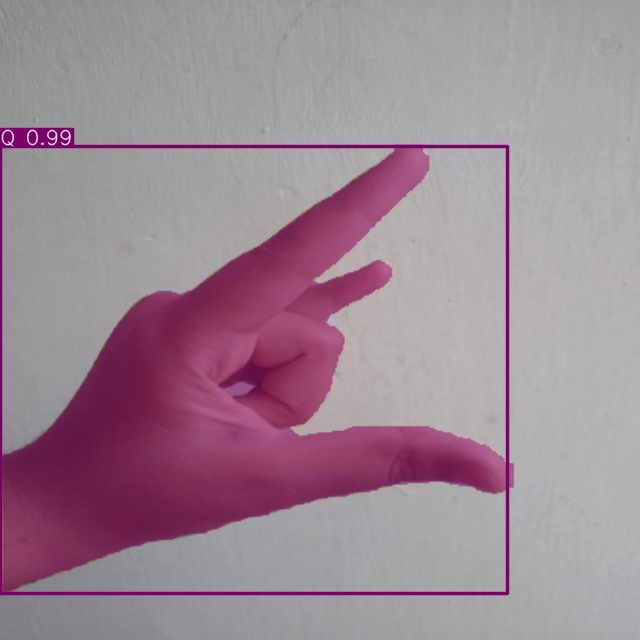

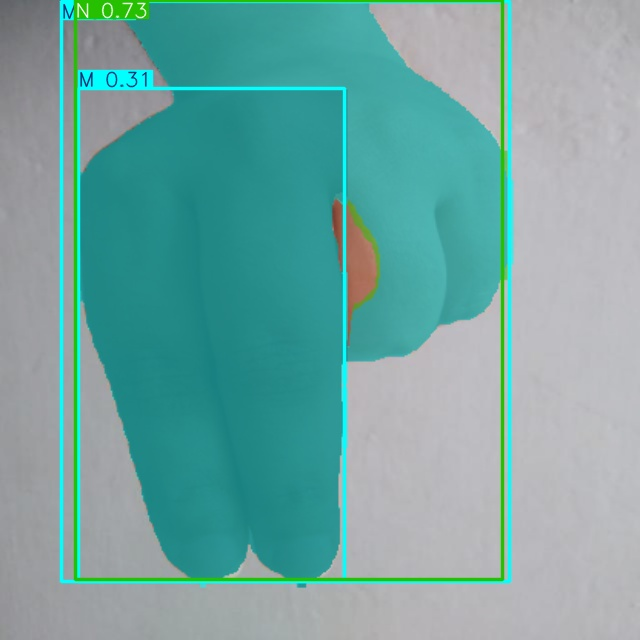

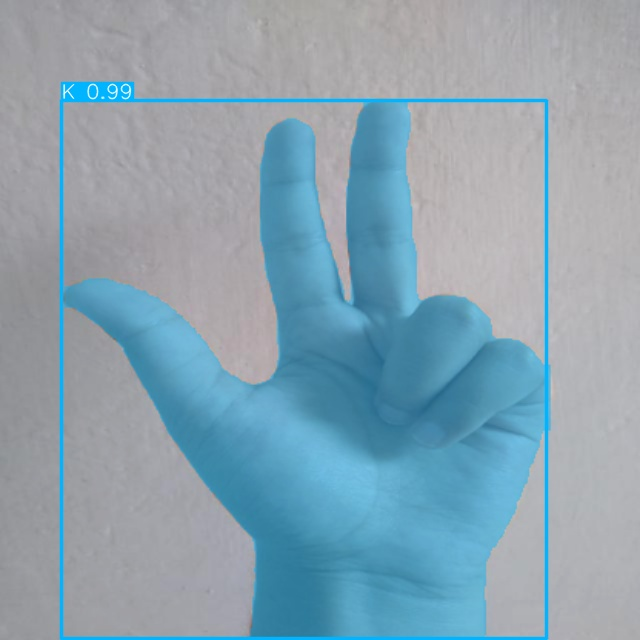

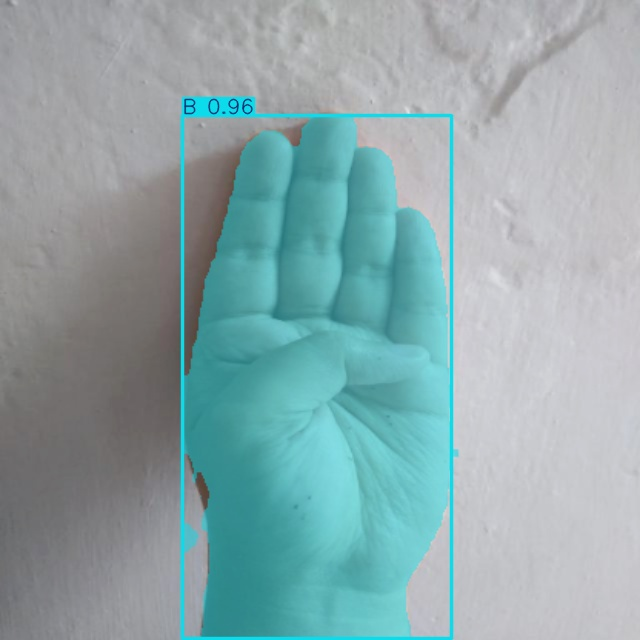

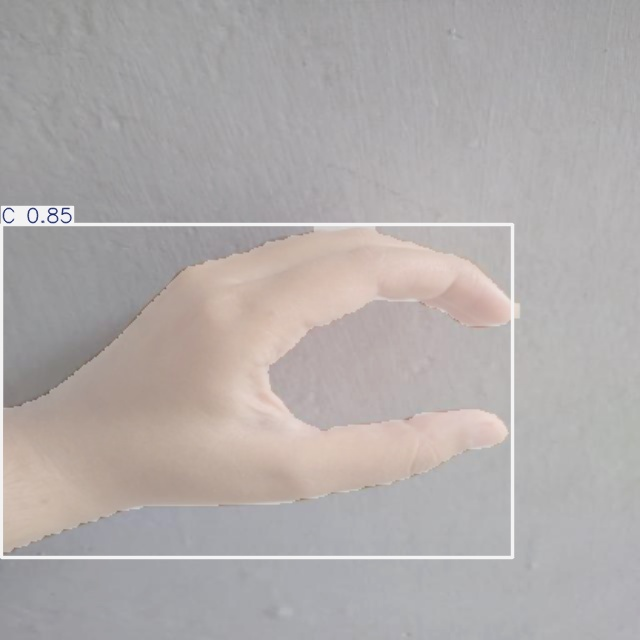

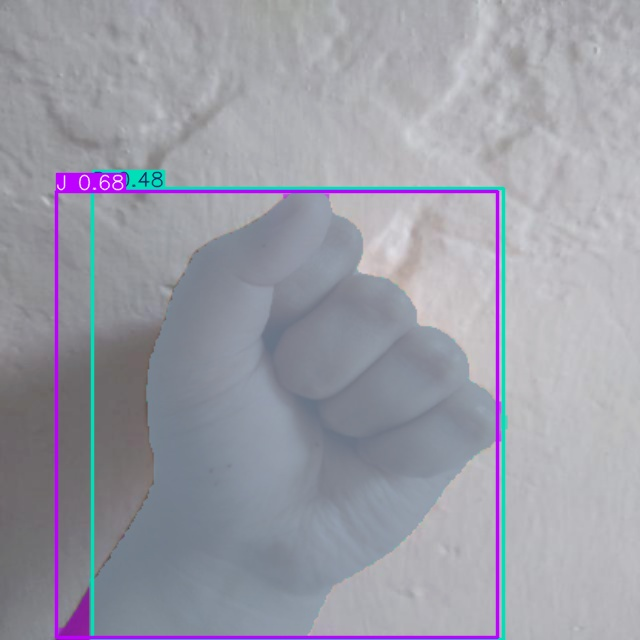

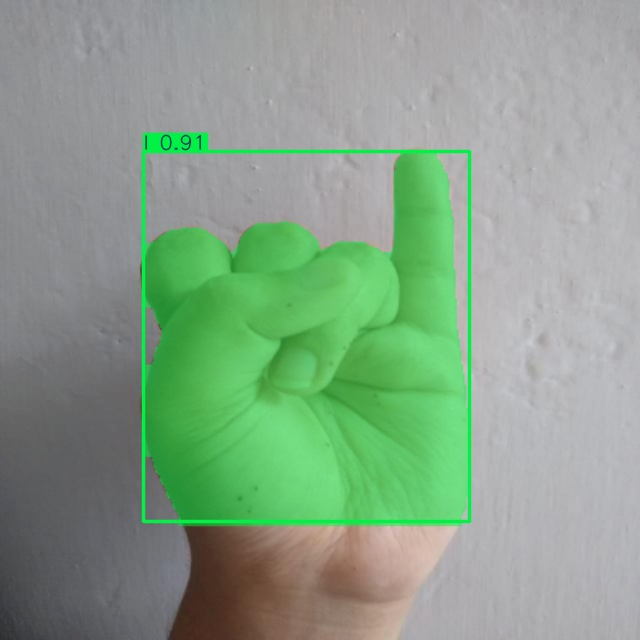

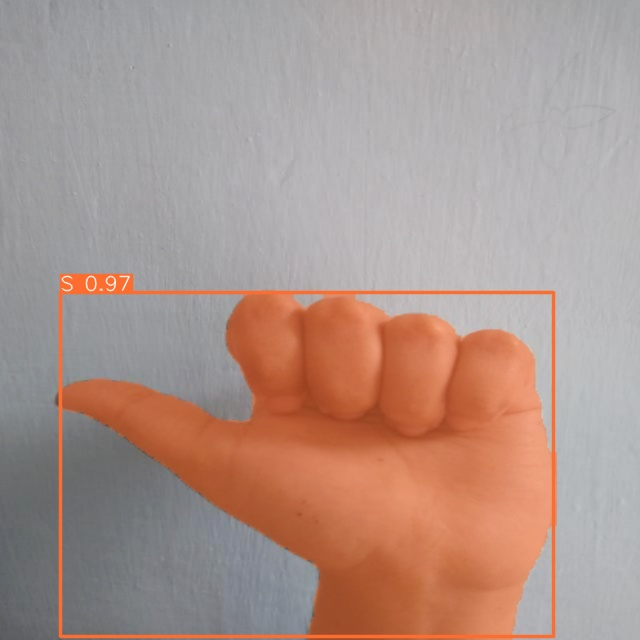

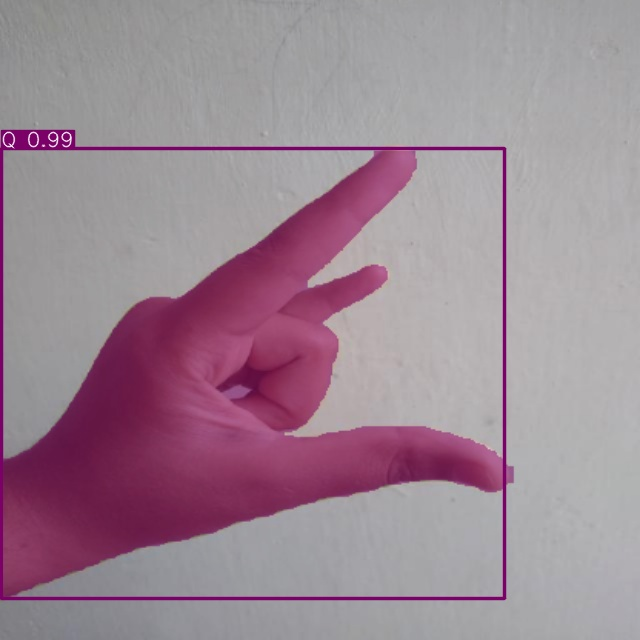

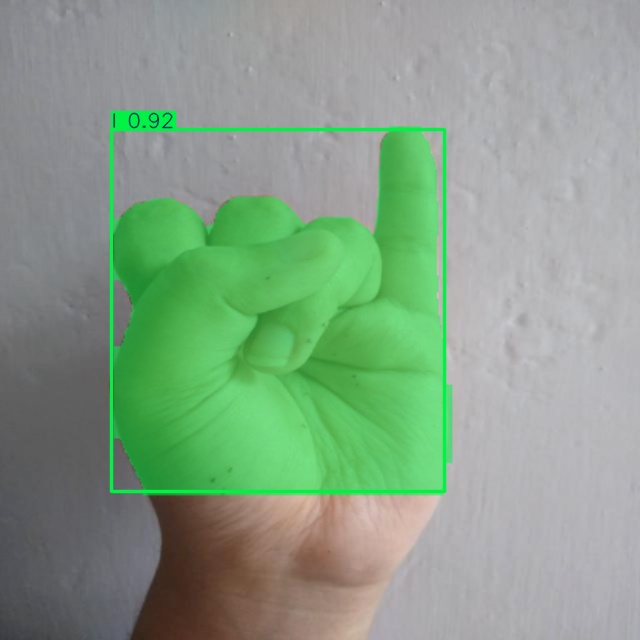

In [ ]:
from IPython.display import Image, display
import os

# Directory containing output images
output_dir = "/content/output4/"

# Iterate over each file in the output directory
for filename in os.listdir(output_dir):
    if filename.endswith(".jpg"):  # Assuming all images are JPEG format
        # Display the image
        display(Image(filename=os.path.join(output_dir, filename), height=600, width=600))